## 行方向仮説を検証するために EDA してみる

In [2]:
import sys
sys.path.append('../')
import pickle

from tqdm import tqdm_notebook as tqdm

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from tools.utils.features import load_features
from tools.utils.configs import load_configs

In [3]:
from IPython.core.display import display, HTML
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
display(HTML("<style>.container { width:90% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}

## start EDA

In [88]:
configs = load_configs('../configs/c010.yml')

USED_CONFIG: ../configs/c010.yml
configs: {'train': {'fold_num': 10, 'fold_type': 'skf', 'sampling_type': 'none', 'os_lim': 1000000, 'sampling_random_state': 71, 'pos_t': 0, 'neg_t': 0, 'single_model': False, 'all_features': False, 'feature_selection': False, 'feature_select_path': 'importances/', 'metric': 'split_cov', 'feature_topk': 150}, 'lgbm_params': {'boosting': 'gbdt', 'boost_from_average': False, 'verbose': -1, 'random_state': 71, 'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.01, 'num_leaves': 13, 'max_depth': -1, 'subsample': 0.4, 'bagging_freq': 5, 'colsample_bytree': 0.05, 'min_data_in_leaf': 60, 'min_sum_hessian_in_leaf': 10.0, 'lambda_l1': 0.1, 'min_data_per_group': 1, 'cat_smooth': 750, 'cat_l2': 100, 'max_cat_to_onehot': 10}, 'features': ['ID_code', 'f001_var_0', 'f001_var_1', 'f001_var_10', 'f001_var_100', 'f001_var_101', 'f001_var_102', 'f001_var_103', 'f001_var_104', 'f001_var_105', 'f001_var_106', 'f001_var_107', 'f001_var_108', 'f001_var_109

In [5]:
features = load_features(configs['features'], '../mnt/inputs/features/')
features.head()

[load_features] start
now loading features ... 
loading from ../mnt/inputs/features/f001_var_100.pkl.gz ...
loading from ../mnt/inputs/features/ID_code.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_1.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_108.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_102.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_104.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_106.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_119.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_120.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_11.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_122.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_124.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_128.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_126.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_131.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_13.pkl.gz ...
l

loading from ../mnt/inputs/features/f001_var_40.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_42.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_44.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_43.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_46.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_45.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_48.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_47.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_5.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_51.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_49.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_53.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_50.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_55.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_52.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_54.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_57.pkl.gz ..

ID_code  f001_var_0  f001_var_1  f001_var_10  f001_var_100  f001_var_101  \
0  train_0      8.9255     -6.7863       2.9252        9.4763       13.3102   
1  train_1     11.5006     -4.1473      -0.4032      -13.6950        8.4068   
2  train_2      8.6093     -2.7457      -0.3249       -0.3939       12.6317   
3  train_3     11.0604     -2.1518       2.3061      -19.8592       22.5316   
4  train_4      9.8369     -1.4834      -9.4458      -22.9264       12.3562   

   f001_var_102  f001_var_103  f001_var_104  f001_var_105     ...       \
0       26.5376        1.4403       14.7100        6.0454     ...        
1       35.4734        1.7093       15.1866        2.6227     ...        
2       14.8863        1.3854       15.0284        3.9995     ...        
3       18.6129        1.3512        9.3291        4.2835     ...        
4       17.3410        1.6940        7.1179        5.1934     ...        

   f001_var_90  f001_var_91  f001_var_92  f001_var_93  f001_var_94  \
0     -21.4494       6.7806      11.0924       9.9913      14.8421   
1       0.4768       6.8852       8.0905      10.9631      11.7569   
2     -22.4038       7.0883      14.1613      10.5080      14.2621   
3      -7.5866       7.0364      14.4027      10.7795       7.2887   
4     -39.7997       7.0065       9.3627      10.4316      14.0553   

   f001_var_95  f001_var_96  f001_var_97  f001_var_98  f001_var_99  
0       0.1812       8.9642      16.2572       2.1743      -3.4132  
1      -1.2722      24.7876      26.6881       1.8944       0.6939  
2       0.2647      20.4031      17.0360       1.6981      -0.0269  
3      -1.0930      11.3596      18.1486       2.8344       1.9480  
4       0.0213      14.7246      35.2988       1.6844       0.6715  

[5 rows x 201 columns]

## check the uniq nums

In [ ]:
# print uniq num
for col in features.columns:
    print(f'{col}: NUNIQ = {features[col].nunique()}')

ID_code: NUNIQ = 400000
f001_var_0: NUNIQ = 109897
f001_var_1: NUNIQ = 130006
f001_var_10: NUNIQ = 161199
f001_var_100: NUNIQ = 199042
f001_var_101: NUNIQ = 150340
f001_var_102: NUNIQ = 191504
f001_var_103: NUNIQ = 9634
f001_var_104: NUNIQ = 80723
f001_var_105: NUNIQ = 41781
f001_var_106: NUNIQ = 78860
f001_var_107: NUNIQ = 176741
f001_var_108: NUNIQ = 8651
f001_var_109: NUNIQ = 135029
f001_var_11: NUNIQ = 164156
f001_var_110: NUNIQ = 126501
f001_var_111: NUNIQ = 49654
f001_var_112: NUNIQ = 64989
f001_var_113: NUNIQ = 141202
f001_var_114: NUNIQ = 45754
f001_var_115: NUNIQ = 98865
f001_var_116: NUNIQ = 68886
f001_var_117: NUNIQ = 225330
f001_var_118: NUNIQ = 187331
f001_var_119: NUNIQ = 134912
f001_var_12: NUNIQ = 9737
f001_var_120: NUNIQ = 213513
f001_var_121: NUNIQ = 70291
f001_var_122: NUNIQ = 149847
f001_var_123: NUNIQ = 163473
f001_var_124: NUNIQ = 104617
f001_var_125: NUNIQ = 16719
f001_var_126: NUNIQ = 33832
f001_var_127: NUNIQ = 110689
f001_var_128: NUNIQ = 114174
f001_var_129: 

In [ ]:
# check the duplicate nums
rowwise_dup_kinds_ratio_matlix = []

for row_col in tqdm(features.columns):
    row_dup_kinds_ratio_matlix = []
    for col_col in tqdm(features.columns):
        row_dup_kinds_ratio_matlix.append(len(set(features[row_col].unique()) & set(features[col_col].unique())) / features[col_col].nunique())
    rowwise_dup_kinds_ratio_matlix.append(row_dup_kinds_ratio_matlix)
rowwise_dup_kinds_ratio_matlix    

In [33]:
with open('../mnt/inputs/utils/rowwise_dup_kinds_ratio_matlix1.pkl', 'wb') as fout:
    pickle.dump(rowwise_dup_kinds_ratio_matlix, fout)

In [24]:
features.head()

ID_code  f001_var_0  f001_var_1  f001_var_10  f001_var_100  f001_var_101  \
0  train_0      8.9255     -6.7863       2.9252        9.4763       13.3102   
1  train_1     11.5006     -4.1473      -0.4032      -13.6950        8.4068   
2  train_2      8.6093     -2.7457      -0.3249       -0.3939       12.6317   
3  train_3     11.0604     -2.1518       2.3061      -19.8592       22.5316   
4  train_4      9.8369     -1.4834      -9.4458      -22.9264       12.3562   

   f001_var_102  f001_var_103  f001_var_104  f001_var_105  f001_var_106  \
0       26.5376        1.4403       14.7100        6.0454        9.5426   
1       35.4734        1.7093       15.1866        2.6227        7.3412   
2       14.8863        1.3854       15.0284        3.9995        5.3683   
3       18.6129        1.3512        9.3291        4.2835       10.3907   
4       17.3410        1.6940        7.1179        5.1934        8.8230   

   f001_var_107  f001_var_108  f001_var_109  f001_var_11  f001_var_110  \
0       17.1554       14.1104       24.3627       3.1821        2.0323   
1       32.0888       13.9550       13.0858       8.0585        6.6203   
2        8.6273       14.1963       20.3882     -11.2648        3.2304   
3        7.0874       14.3256       14.4135       2.8102        4.2827   
4       10.6617       14.0837       28.2749     -12.1419       -0.1937   

   f001_var_111  f001_var_112  f001_var_113  f001_var_114  f001_var_115  \
0        6.7602        3.9141       -0.4851        2.5240        1.5093   
1        7.1051        5.3523        8.5426        3.6159        4.1569   
2        5.7033        4.5255        2.1929        3.1290        2.9044   
3        6.9750        1.6480       11.6896        2.5762       -2.5459   
4        5.9654        1.0719        7.9923        2.9138       -3.6135   

   f001_var_116  f001_var_117  f001_var_118  f001_var_119  f001_var_12  \
0        2.5516       15.5752      -13.4221        7.2739      14.0137   
1        3.0454        7.8522      -11.5100        7.5109      14.0239   
2        1.1696       28.7632      -17.2738        2.1056      14.1929   
3        5.3446       38.1015        3.5732        5.0988      13.8463   
4        1.4684       25.6795       13.8224        4.7478      13.8481   

   f001_var_120  f001_var_121  f001_var_122  f001_var_123  f001_var_124  \
0       16.0094        9.7268        0.8897        0.7754        4.2218   
1       31.5899        9.5018        8.2736       10.1633        0.1225   
2       21.1613        8.9573        2.7768       -2.1746        3.6932   
3       30.5644       11.3025        3.9618       -8.2464        2.7038   
4       41.1037       12.7140        5.2964        9.7289        3.9370   

   f001_var_125  f001_var_126  f001_var_127  f001_var_128  f001_var_129  \
0       12.0039       13.8571       -0.7338       -1.9245       15.4462   
1       12.5942       14.5697        2.4354        0.8194       16.5346   
2       12.4653       14.1978       -2.5511       -0.9479       17.1092   
3       12.3441       12.5431       -1.3683        3.5974       13.9761   
4       12.1316       12.5815        7.0642        5.6518       10.9346   

   f001_var_13  f001_var_130  f001_var_131  f001_var_132  f001_var_133  \
0       0.5745       12.8287        0.3587        9.6508        6.5674   
1       8.4135       12.4205       -0.1780        5.7582        7.0513   
2       7.3124       11.5419        0.0975        8.8186        6.6231   
3      11.9704       14.3003        1.0486        8.9500        7.1954   
4       7.8895       11.4266        0.9442        7.7532        6.6173   

   f001_var_134  f001_var_135  f001_var_136  f001_var_137  f001_var_138  \
0        5.1726        3.1345       29.4547       31.4045        2.8279   
1        1.9568       -8.9921        9.7797       18.1577       -1.9721   
2        3.9358      -11.7218       24.5437       15.5827        3.8212   
3       -1.1984        1.9586       27.5609       24.6065       -2.8233   
4       -6.830

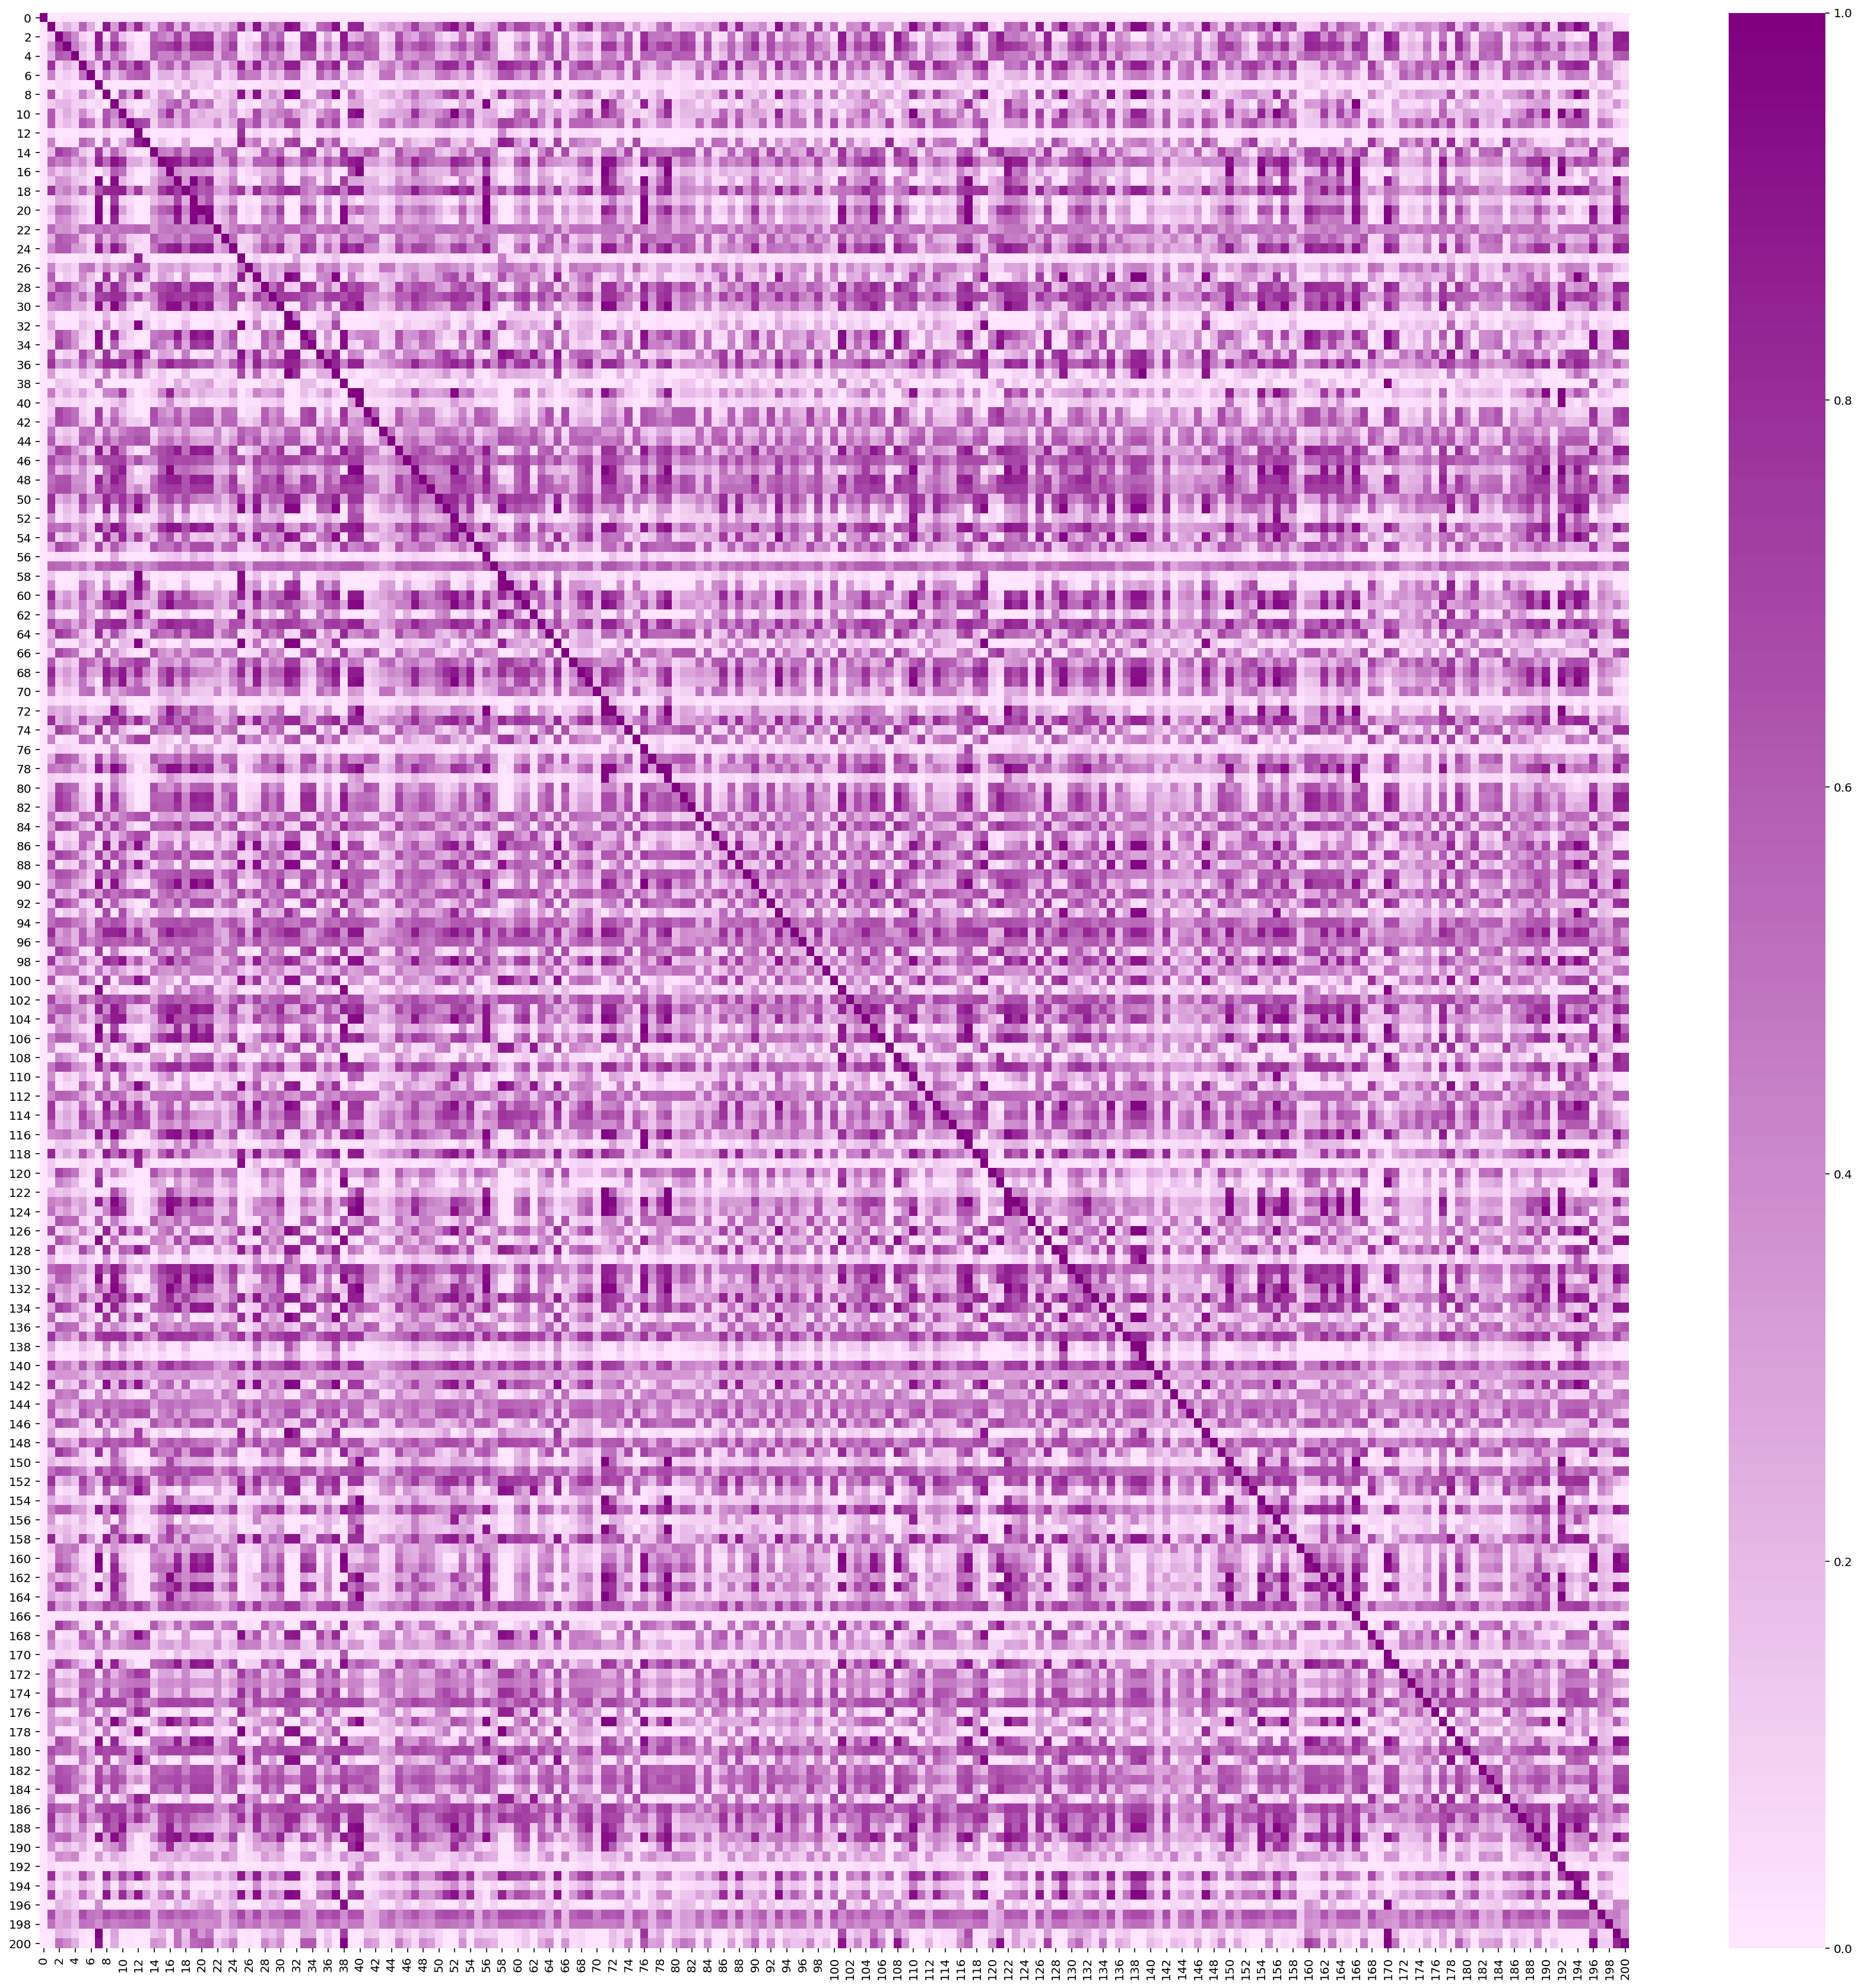

In [20]:
plt.figure(figsize=(30, 30))
sns.heatmap(rowwise_dup_kinds_ratio_matlix, cmap=sns.light_palette('purple', 100))

In [22]:
pd.DataFrame(rowwise_dup_kinds_ratio_matlix)

0         1         2         3         4         5         6    \
0    1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.0  1.000000  0.087311  0.243519  0.124858  0.576932  0.252872   
2    0.0  0.103288  1.000000  0.612696  0.407266  0.092976  0.035775   
3    0.0  0.357198  0.759703  1.000000  0.454783  0.257476  0.094254   
4    0.0  0.226139  0.623533  0.561548  1.000000  0.167307  0.063910   
5    0.0  0.789248  0.107518  0.240132  0.126370  1.000000  0.399062   
6    0.0  0.440649  0.052698  0.111973  0.061490  0.508328  1.000000   
7    0.0  0.000619  0.064866  0.051675  0.029280  0.007510  0.003441   
8    0.0  0.654140  0.020676  0.143797  0.076195  0.453838  0.201374   
9    0.0  0.123707  0.196268  0.211112  0.107550  0.104869  0.033931   
10   0.0  0.611172  0.103011  0.259716  0.127938  0.392184  0.140791   
11   0.0  0.601308  0.092673  0.183959  0.097844  0.619902  0.509645   
12   0.0  0.064633  0.000000  0.001737  0.002326  0.049508  0.026882   
13   0.0  0.440876  0.002431  0.045044  0.028888  0.560124  0.449045   
14   0.0  0.184182  0.739066  0.635879  0.498659  0.140768  0.052474   
15   0.0  0.580425  0.439049  0.514569  0.276484  0.409518  0.154801   
16   0.0  0.313393  0.137271  0.220169  0.107133  0.200911  0.060552   
17   0.0  0.125072  0.354284  0.335244  0.179088  0.116070  0.041200   
18   0.0  0.777073  0.340530  0.452943  0.240432  0.570460  0.240919   
19   0.0  0.057627  0.264819  0.239710  0.127943  0.074112  0.027409   
20   0.0  0.189059  0.548482  0.500313  0.281132  0.154104  0.054725   
21   0.0  0.085471  0.406581  0.359742  0.198013  0.091586  0.035613   
22   0.0  0.537849  0.342392  0.374878  0.236885  0.535307  0.474283   
23   0.0  0.242436  0.627556  0.563750  0.516956  0.180105  0.070844   
24   0.0  0.429730  0.617818  0.615295  0.348660  0.305634  0.109966   
25   0.0  0.074643  0.000000  0.002314  0.002849  0.055700  0.030057   
26   0.0  0.419930  0.108449  0.161465  0.089072  0.458887  0.505953   
27   0.0  0.590098  0.012692  0.128369  0.067744  0.397991  0.173432   
28   0.0  0.368199  0.715475  0.667808  0.415596  0.263822  0.095852   
29   0.0  0.722285  0.477986  0.534501  0.305423  0.565817  0.254569   
30   0.0  0.382722  0.452648  0.492069  0.262211  0.275535  0.092280   
31   0.0  0.143971  0.000000  0.016706  0.010018  0.095836  0.047153   
32   0.0  0.272655  0.000000  0.022630  0.015268  0.193734  0.100452   
33   0.0  0.143070  0.654501  0.560252  0.331166  0.124212  0.045931   
34   0.0  0.052977  0.720621  0.566449  0.361682  0.064900  0.028250   
35   0.0  0.672985  0.024853  0.125001  0.068272  0.684522  0.412299   
36   0.0  0.772396  0.321554  0.431268  0.230595  0.571990  0.246627   
37   0.0  0.327934  0.000015  0.047804  0.026587  0.221325  0.106045   
38   0.0  0.000309  0.153293  0.118772  0.069769  0.000446  0.005619   
39   0.0  0.469412  0.104703  0.238990  0.116624  0.297339  0.096160   
40   0.0  0.154117  0.045021  0.087128  0.041293  0.091945  0.025874   
41   0.0  0.109958  0.701883  0.590940  0.513801  0.091320  0.035117   
42   0.0  0.227850  0.681438  0.602212  0.525713  0.170254  0.068375   
43   0.0  0.490314  0.083358  0.154846  0.083731  0.516070  0.548385   
44   0.0  0.606850  0.147101  0.236769  0.127144  0.600825  0.509337   
45   0.0  0.329809  0.721228  0.661108  0.402403  0.240768  0.086562   
46   0.0  0.689200  0.467255  0.513179  0.308136  0.589936  0.299331   
47   0.0  0.590689  0.180569  0.330151  0.163815  0.389783  0.135752   
48   0.0  0.514127  0.636901  0.643999  0.373745  0.361547  0.134686   
49   0.0  0.566176  0.656993  0.650451  0.415465  0.409951  0.168571   
50   0.0  0.794480  0.212713  0.332825  0.176571  0.713629  0.383684   
51   0.0  0.774871  0.046382  0.180888  0.095402  0.596674  0.282647   
52   0.0  0.365906  0.038644  0.145832  0.071744  0.230198  0.075152   
53   0.0  0.542344  0.495600  0.552199  0.299736  0.379633  0.139961   
54   0.0  0.738928  0.083565  0.237322  0.120

In [4]:
# もとの train でやってみる
features = pd.read_csv('../mnt/inputs/origin/train.csv.zip')

In [5]:
features = features.drop(['target', 'ID_code'], axis=1)

In [27]:
# check the duplicate nums
rowwise_dup_kinds_ratio_matlix = []

for row_col in tqdm(features.columns):
    row_dup_kinds_ratio_matlix = []
    for col_col in tqdm(features.columns):
        row_dup_kinds_ratio_matlix.append(len(set(features[row_col].unique()) & set(features[col_col].unique())) / features[col_col].nunique())
    rowwise_dup_kinds_ratio_matlix.append(row_dup_kinds_ratio_matlix)
rowwise_dup_kinds_ratio_matlix    

[[1.0,
  0.06306686740351779,
  0.7688290682225175,
  0.5956807914527393,
  0.8567582460836023,
  0.09481737798608797,
  0.4487681028005907,
  0.407013186109467,
  0.08274435442165144,
  0.7345650282291519,
  0.20127520114317665,
  0.0958653691058659,
  0.7234598891329359,
  0.5456976411040015,
  0.6612320214352518,
  0.6303382130237254,
  0.7507190685473665,
  0.05710948100099403,
  0.3561122459950543,
  0.359585240671383,
  0.4607479415171723,
  0.3134754608673302,
  0.35131259651444957,
  0.060972183197527396,
  0.6556455219265278,
  0.7682623039116677,
  0.07874009552360944,
  0.0011132341945667525,
  0.45441869544605257,
  0.41666761000237723,
  0.04591819259198367,
  0.8139117175789529,
  0.026127216043925365,
  0.5057243916998547,
  0.8837625178826896,
  0.3468508955419009,
  0.1906767354051699,
  0.49053643724696355,
  0.5987812700449006,
  0.15405506150487247,
  0.08141501853705296,
  0.457148056044156,
  0.888294504937959,
  0.8787200421385304,
  0.49036037023695794,
  0.1091

In [31]:
type(rowwise_dup_kinds_ratio_matlix)

list

In [34]:
with open('../mnt/inputs/utils/rowwise_dup_kinds_ratio_matlix_origin.pkl', 'wb') as fout:
    pickle.dump(rowwise_dup_kinds_ratio_matlix, fout)

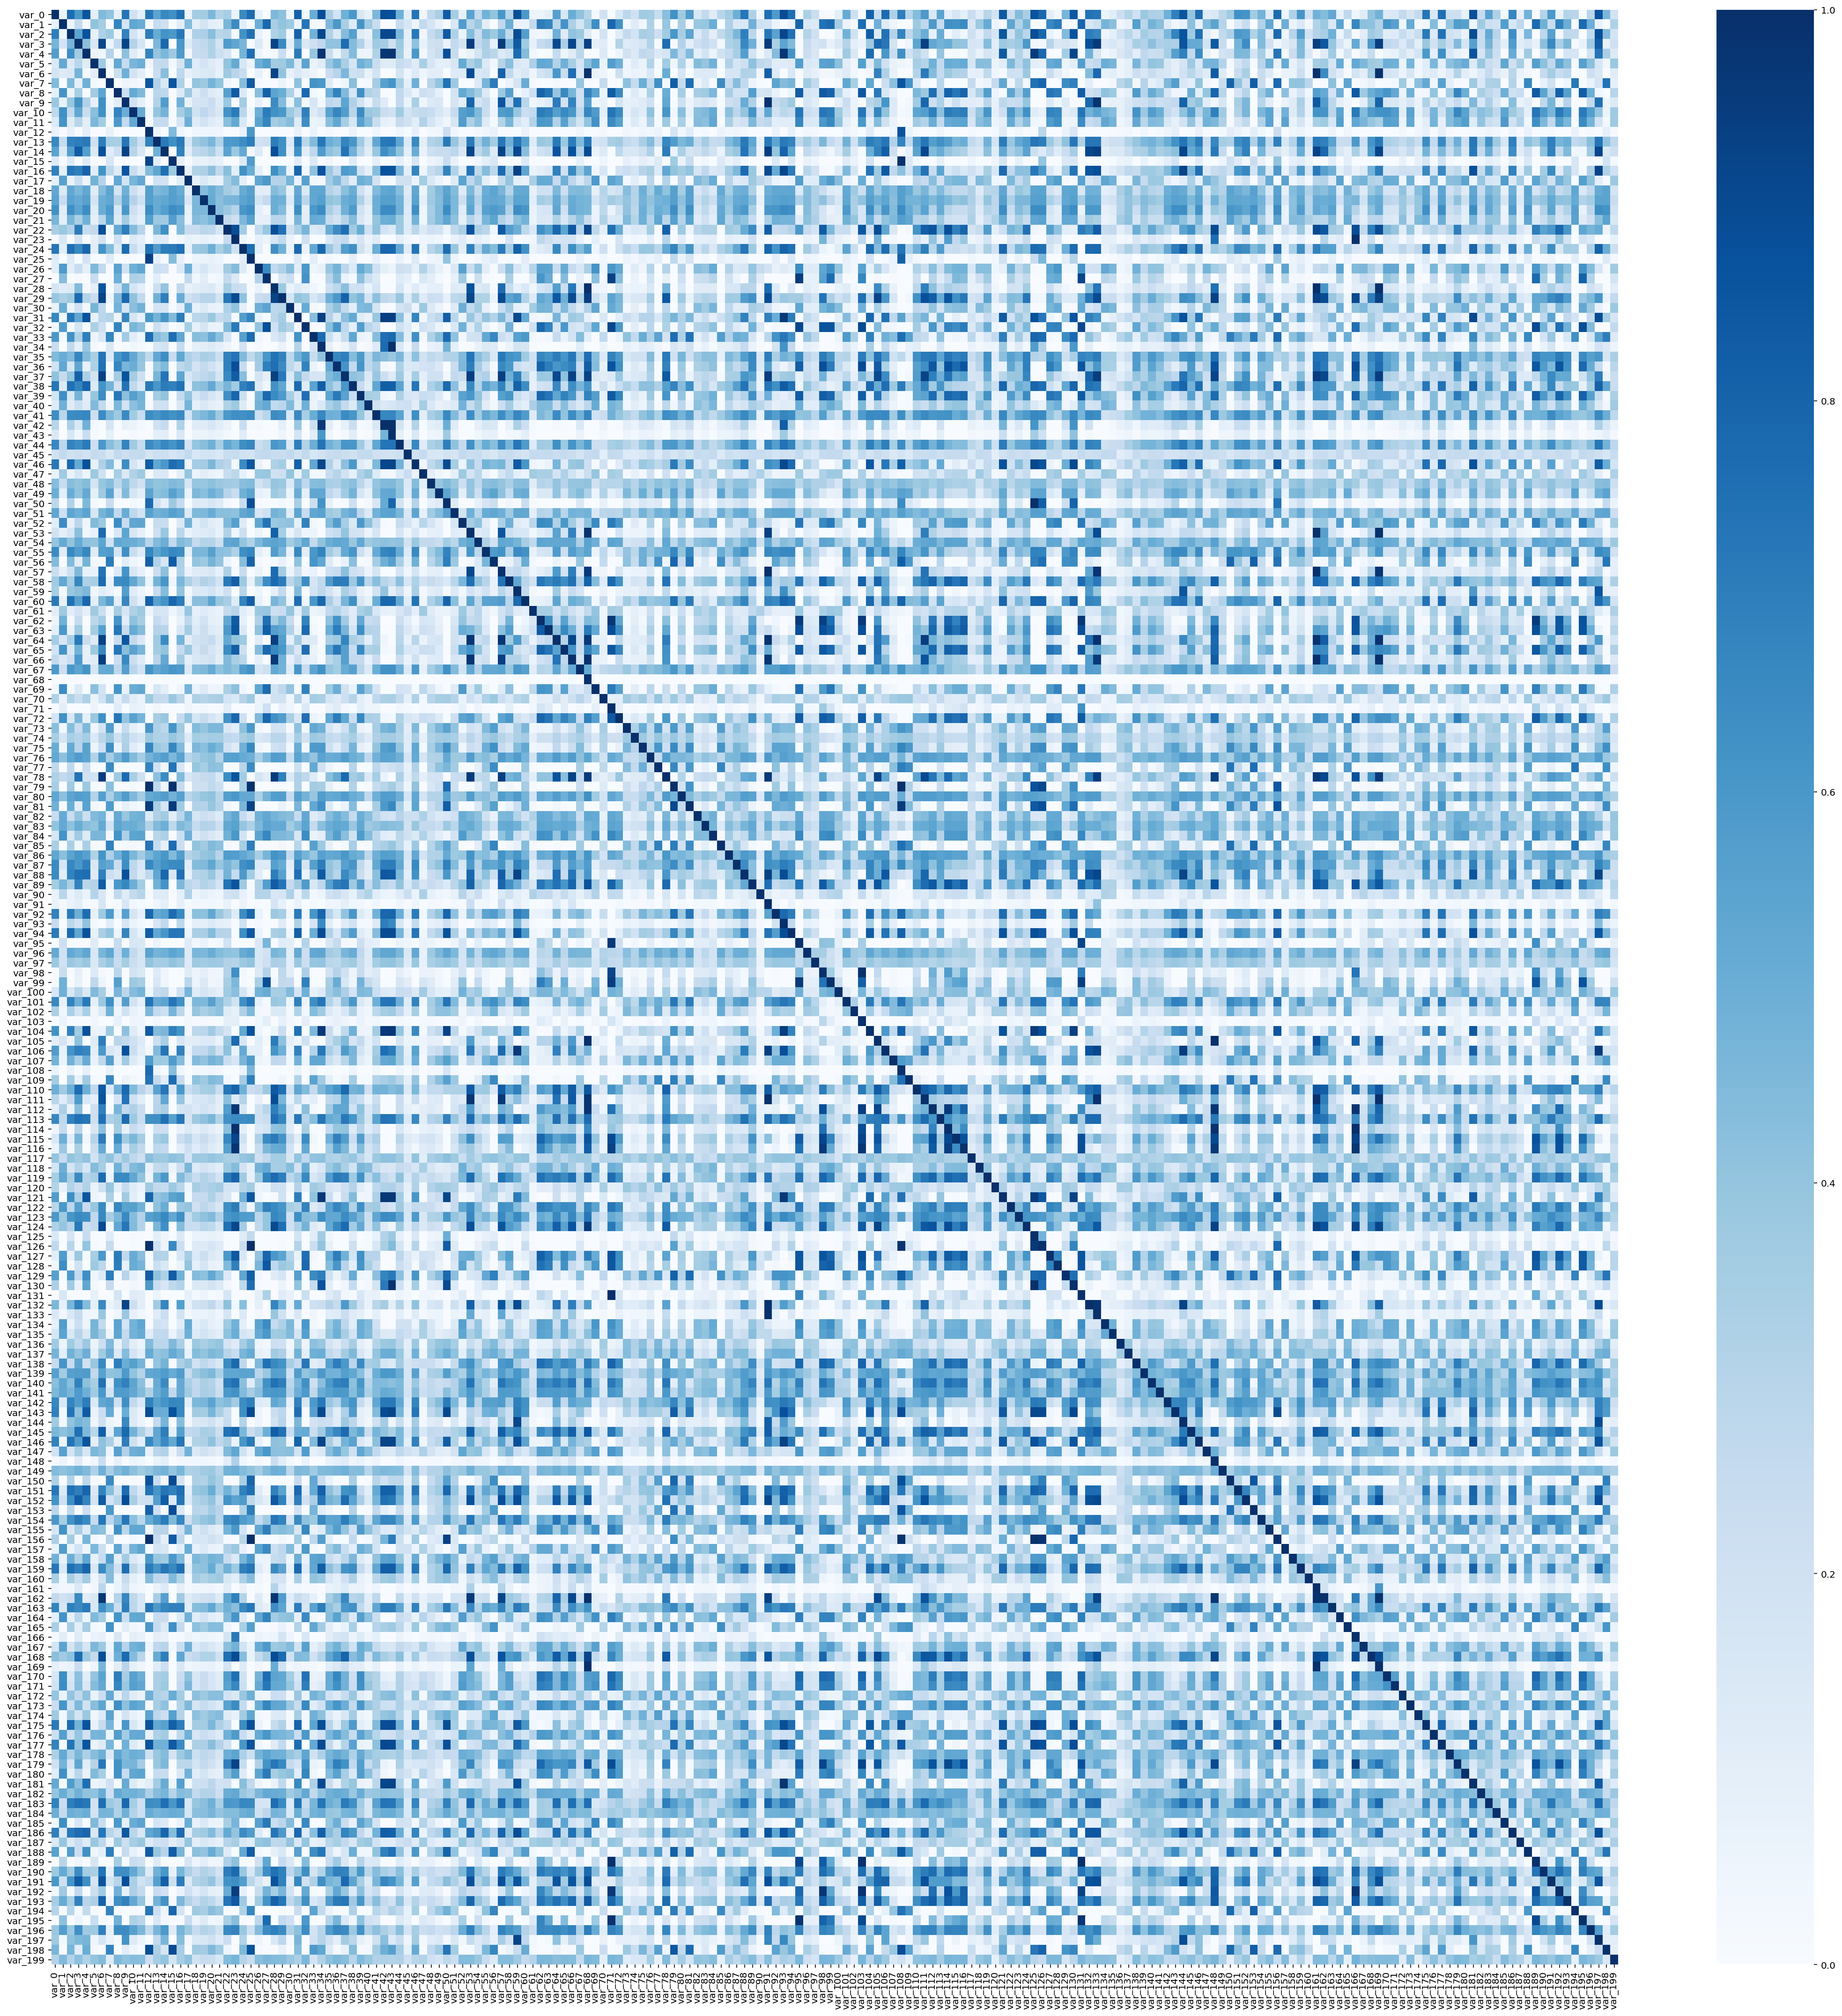

In [46]:
plt.figure(figsize=(30, 30))
sns.heatmap(rowwise_dup_kinds_ratio_matlix, cmap=plt.cm.Blues, xticklabels=features.columns.tolist(), yticklabels=features.columns.tolist())
plt.tight_layout()
plt.savefig('../mnt/figs/rowwise_dup_kinds_ratio_matlix_origin.png')

In [48]:
features.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  var_10   var_11   var_12   var_13  var_14   var_15   var_16  \
0  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989  14.5691   5.7487   
1  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345  13.7003  13.8275   
2  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244  14.6472   7.6782   
3  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569  14.8372  10.7430   
4  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894  15.0553   8.4871   

    var_17   var_18   var_19   var_20   var_21   var_22  var_23   var_24  \
0  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791  2.4716  14.3831   
1 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524  3.3716   6.9779   
2  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145  3.5137   5.6777   
3  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202  2.7229  12.1354   
4  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102  2.7142  14.2080   

    var_25   var_26  var_27  var_28  var_29   var_30   var_31  var_32  \
0  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085  12.9041 -3.8766   
1  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   7.8755  1.2859   
2  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025  12.4858 -2.2871   
3  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398  10.4407 -2.5731   
4  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   9.4668 -0.0083   

    var_33   var_34   var_35  var_36  var_37   var_38  var_39   var_40  \
0  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667  3.8743  -5.2387   
1  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160  3.6783 -11.1147   
2  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917  0.9003 -13.5174   
3   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738  0.6665  -3.8294   
4  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038  1.4450  -5.5963   

    var_41   var_42   var_43   var_44   var_45   var_46   var_47   var_48  \
0   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226 -14.2136  16.0283   
1   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   0.1948  34.4014   
2   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405  -5.7864  20.7477   
3  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404 -35.1659   0.7613   
4  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   0.0444  -0.1346   

    var_49   var_50   var_51  var_52  var_53  var_54   var_55   var_56  \
0   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474  14.8322  11.2668   
1  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946  18.5995  19.3219   
2   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   6.2846  15.6372   
3   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913  12.3972  14.4698   
4  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414  14.1482  16.9840   

   var_57  var_58   var_59   var_60   var_61  var_62  var_63  var_64  var_65  \
0  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771 -0.2154  8.6748  9.5319   
1  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944 -1.3147  8.1042  1.5365   
2  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748  5.8042  3.7163 -1.1016   
3  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418 -4.3923  8.6464  6.3072   
4  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952 -1.7839  5.2670 -4.3205   

   var_66   var_67  var_68  var_69   var_70  var_71  var_72   var_73   var_74  \
0  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663  5.1999   8.8600  43.1127   
1  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134  3.1701  20.1068   7.7841   
2  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520  6.3577  12.1719  19.7312   
3  5.6221  23.6143 

In [ ]:
# plt.savefig('../mnt/figs/rowwise_dup_kinds_ratio_matlix_origin.png')
# fig.savefig('../mnt/figs/rowwise_dup_kinds_ratio_matlix_origin.png')

In [49]:
#rowwise_dup_kinds_ratio_matlix check the duplicate nums
colwise_dup_kinds_ratio_matlix = []

for row_col in tqdm(features.columns):
    col_dup_kinds_ratio_matlix = []
    for col_col in tqdm(features.columns):
        col_dup_kinds_ratio_matlix.append(len(set(features[row_col].unique()) & set(features[col_col].unique())) / features[row_col].nunique())
    colwise_dup_kinds_ratio_matlix.append(col_dup_kinds_ratio_matlix)
# rowwise_dup_kinds_ratio_matlix    

In [50]:
with open('../mnt/inputs/utils/colwise_dup_kinds_ratio_matlix_origin.pkl', 'wb') as fout:
    pickle.dump(colwise_dup_kinds_ratio_matlix, fout)

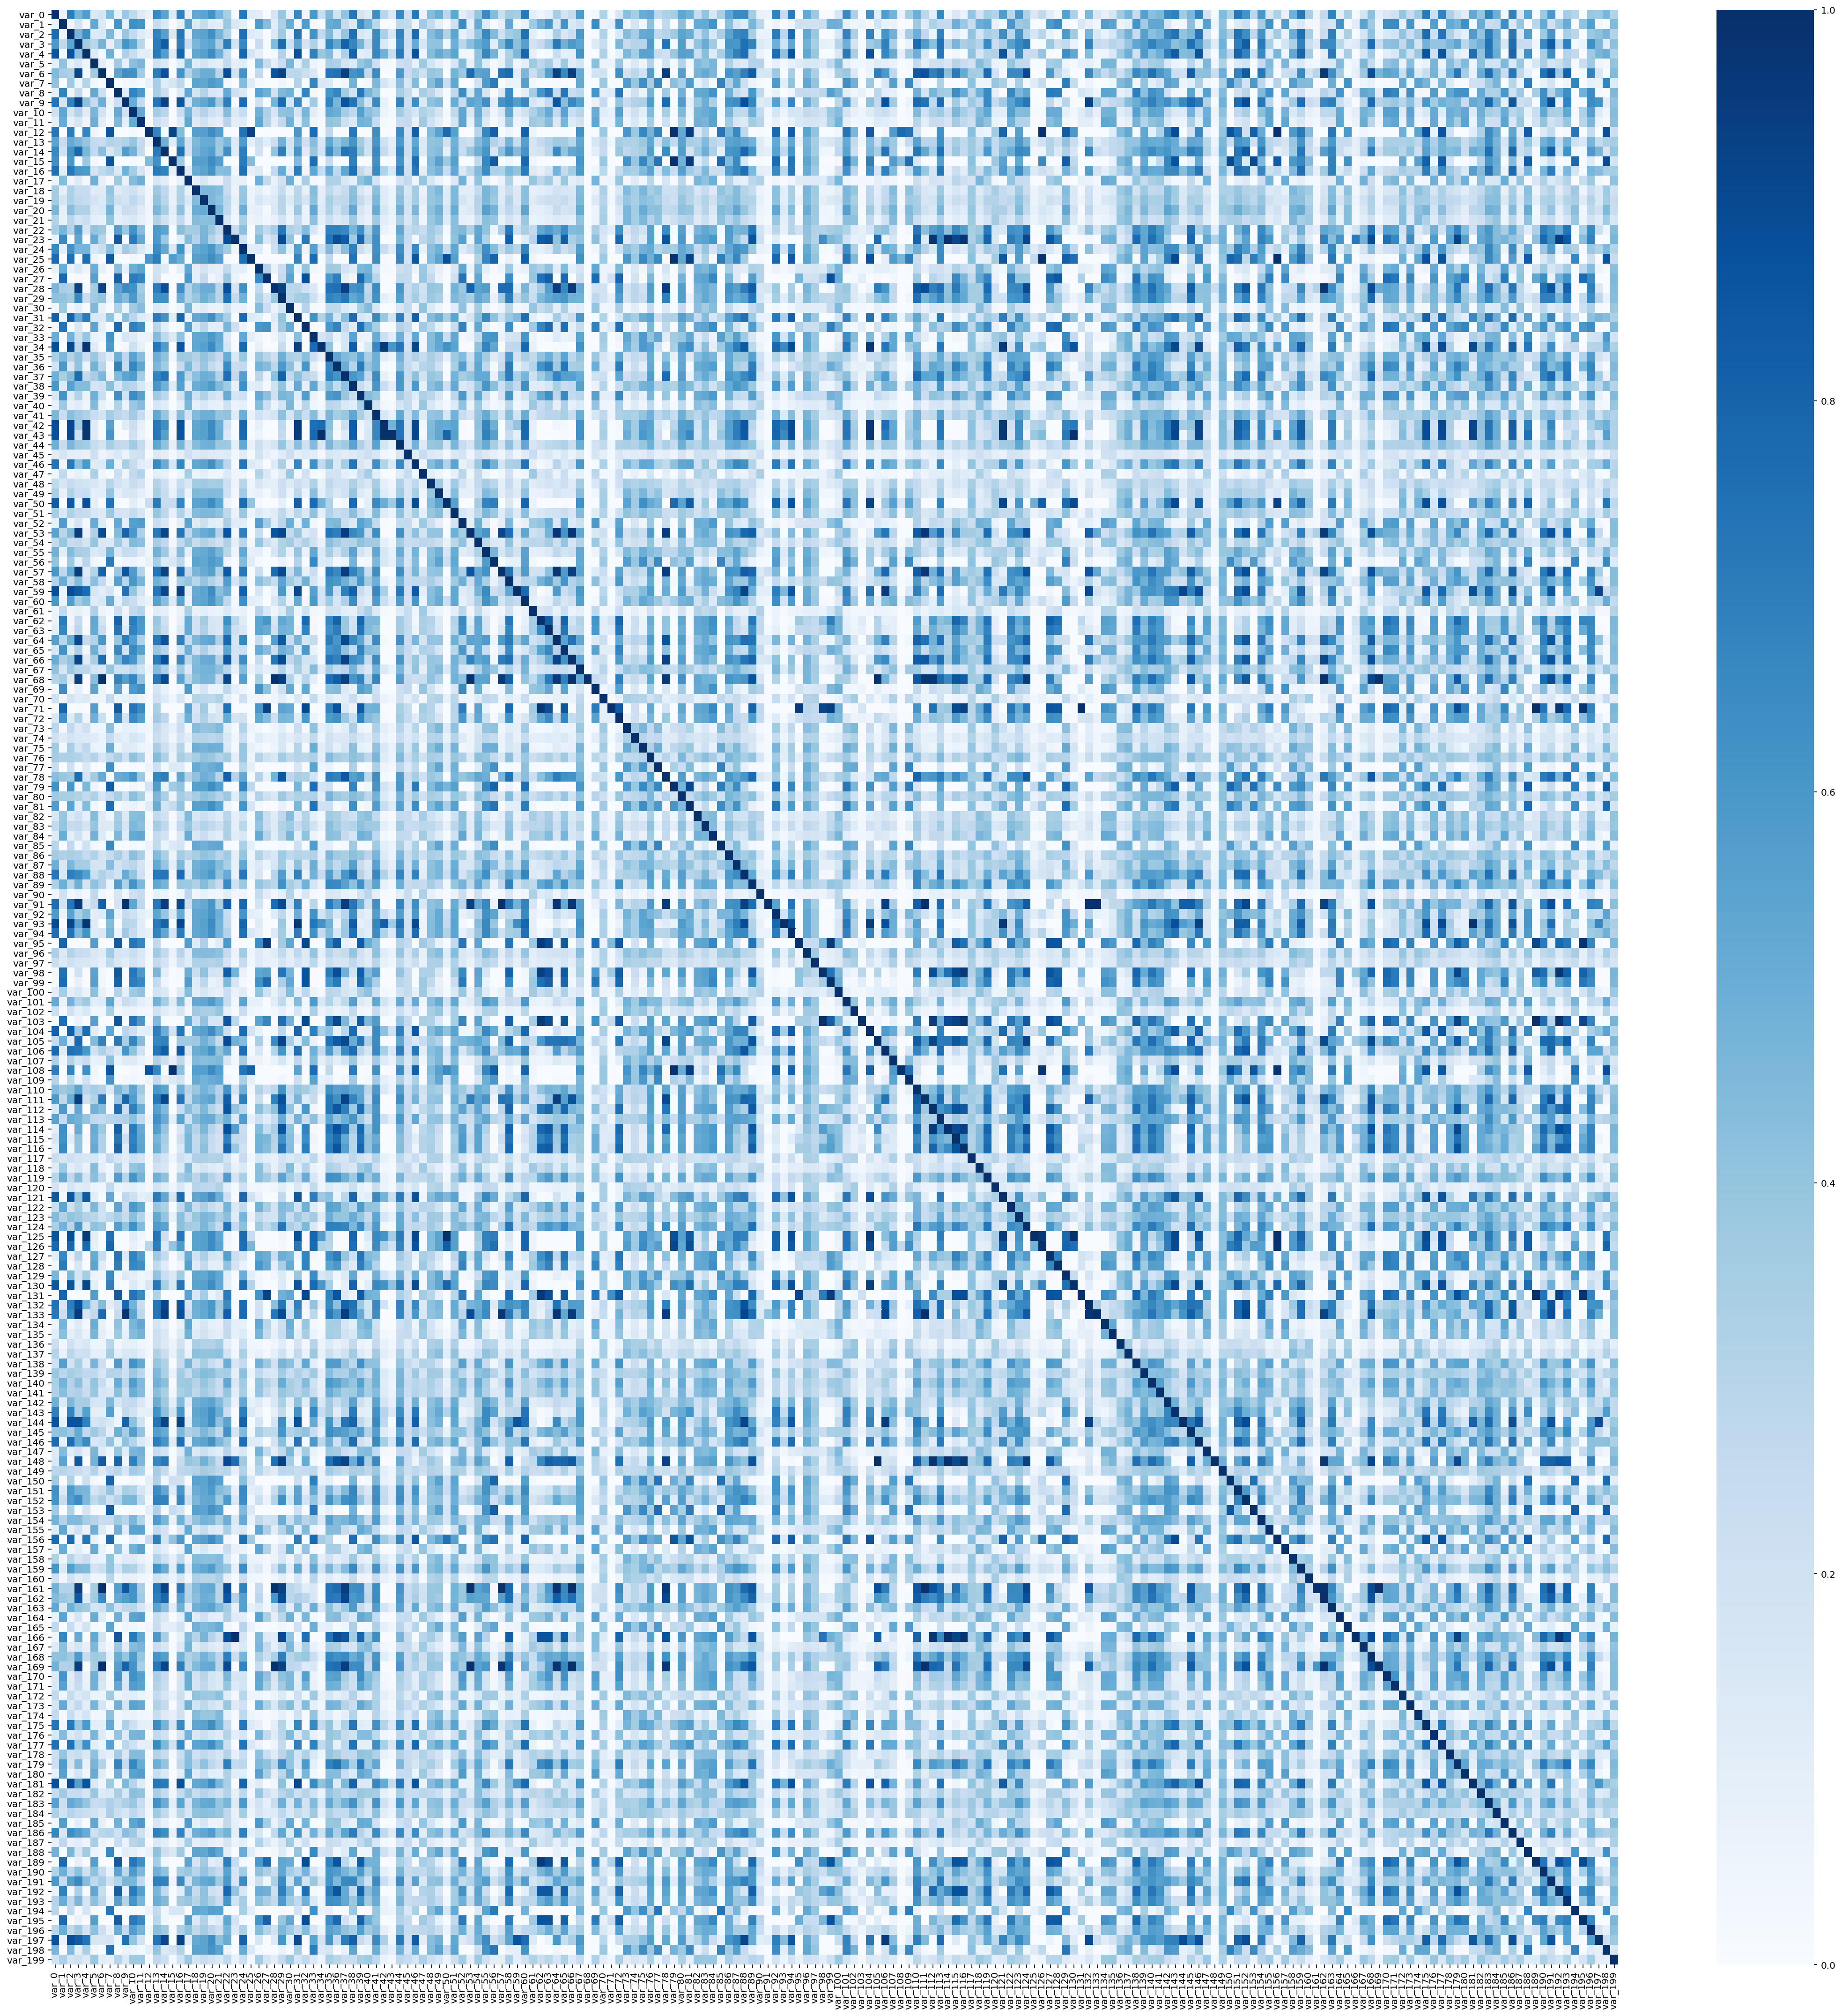

In [51]:
plt.figure(figsize=(30, 30))
sns.heatmap(colwise_dup_kinds_ratio_matlix, cmap=plt.cm.Blues, xticklabels=features.columns.tolist(), yticklabels=features.columns.tolist())
plt.tight_layout()
plt.savefig('../mnt/figs/colwise_dup_kinds_ratio_matlix_origin.png')

In [59]:
col_df = pd.DataFrame(colwise_dup_kinds_ratio_matlix, index=features.columns, columns=features.columns)
row_df = pd.DataFrame(rowwise_dup_kinds_ratio_matlix, index=features.columns, columns=features.columns)
col_df.shape, row_df.shape

((200, 200), (200, 200))

In [67]:
# analysis
analyses = []
for col1 in tqdm(features.columns):
    for col2 in features.columns:
        if col1 == col2 or col1 > col2:
            continue
        analyses.append([f'{col1}_{col2}', col_df.loc[col1, col2], row_df.loc[col1, col2], col_df.loc[col1, col2] + row_df.loc[col1, col2]])
analysis_df = pd.DataFrame(analyses, columns=['idx', 'col_df', 'row_df', 'col_sum']).sort_values('col_sum', ascending=False).set_index('idx')
analysis_df.head(100)

col_df    row_df   col_sum
idx                                          
var_197_var_59   0.864618  0.928598  1.793215
var_28_var_6     0.929251  0.863287  1.792537
var_144_var_197  0.893115  0.894393  1.787508
var_144_var_59   0.856731  0.921444  1.778176
var_53_var_57    0.912313  0.858799  1.771112
var_126_var_156  0.981272  0.782694  1.763966
var_34_var_42    0.968487  0.771429  1.739916
var_166_var_23   0.997710  0.716935  1.714645
var_132_var_9    0.787425  0.922962  1.710386
var_111_var_57   0.740530  0.968012  1.708543
var_6_var_66     0.941967  0.761892  1.703859
var_130_var_50   0.798215  0.905194  1.703409
var_111_var_66   0.862819  0.840074  1.702892
var_121_var_4    0.843295  0.858962  1.702258
var_111_var_64   0.946518  0.740649  1.687167
var_28_var_66    0.961934  0.722811  1.684746
var_116_var_192  0.811540  0.872022  1.683562
var_28_var_53    0.810898  0.869038  1.679936
var_156_var_50   0.744032  0.935774  1.679807
var_111_var_53   0.700327  0.972504  1.672832
var_162_var_66   0.759252  0.913164  1.672415
var_53_var_6     0.895278  0.776082  1.671360
var_64_var_66    0.740969  0.921965  1.662934
var_53_var_66    0.976689  0.684799  1.661488
var_104_var_121  0.778347  0.873777  1.652124
var_27_var_99    0.883925  0.767662  1.651587
var_57_var_66    0.946322  0.704853  1.651175
var_126_var_50   0.823085  0.825709  1.648794
var_112_var_116  0.841060  0.801503  1.642563
var_112_var_114  0.681740  0.957037  1.638777
var_104_var_4    0.764316  0.873967  1.638283
var_108_var_12   0.865924  0.772095  1.638019
var_162_var_78   0.908269  0.721496  1.629765
var_131_var_71   0.629100  0.998226  1.627326
var_181_var_4    0.861352  0.761663  1.623015
var_3_var_64     0.719184  0.903501  1.622686
var_37_var_78    0.772773  0.845351  1.618124
var_162_var_6    0.650202  0.966839  1.617041
var_162_var_64   0.821765  0.794321  1.616086
var_14_var_3     0.782349  0.829805  1.612154
var_161_var_169  0.999910  0.606841  1.606751
var_150_var_153  0.750765  0.851902  1.602667
var_34_var_43    0.602925  0.998947  1.601871
var_131_var_95   0.924991  0.675605  1.600596
var_195_var_99   0.867410  0.724343  1.591753
var_114_var_116  0.946453  0.642491  1.588945
var_195_var_27   0.807776  0.776705  1.584481
var_162_var_28   0.609137  0.974985  1.584122
var_132_var_14   0.913679  0.668878  1.582557
var_31_var_4     0.713353  0.869165  1.582518
var_111_var_6    0.717868  0.864142  1.582009
var_37_var_64    0.678492  0.903148  1.581639
var_111_var_28   0.688361  0.891938  1.580299
var_3_var_37     0.812432  0.766764  1.579196
var_132_var_144  0.649172  0.926272  1.575444
var_106_var_132  0.707268  0.867738  1.575006
var_162_var_37   0.911945  0.662222  1.574167
var_114_var_23   0.575016  0.994421  1.569437
var_181_var_31   0.907521  0.658629  1.566150
var_64_var_78    0.859445  0.706300  1.565745
var_57_var_64    0.978872  0.585965  1.564837
var_111_var_162  0.863722  0.699212  1.562935
var_64_var_9     0.709864  0.852966  1.562829
var_132_var_3    0.879357  0.682802  1.562159
var_106_var_88   0.850433  0.711698  1.562131
var_189_var_195  0.902763  0.651512  1.554275
var_32_var_99    0.693325  0.860043  1.553368
var_121_var_181  0.721540  0.831137  1.552677
var_106_var_14   0.817758  0.734486  1.552244
var_104_var_177  0.840170  0.711841  1.552011
var_189_var_95   0.640193  0.909824  1.550017
var_57_var_6     0.806443  0.742636  1.549078
var_121_var_31   0.843095  0.704812  1.547907
var_3_var_9      0.615842  0.929640  1.545482
var_28_var_57    0.769235  0.776030  1.545265
var_195_var_62   0.871004  0.674071  1.545075
var_66_var_78    0.930095  0.614305  1.544400
var_29_var_78    0.693771  0.848216  1.541987
var_112_var_192  0.759929  0.778160  1.538088
var_2_var_31     0.725885  0.811870  1.537755
var_146_var_31   0.735892  0.801752  1.537644
var_169_var_53   0.994628  0.542259  1.536887
var_12_var_25    0.933584  0.600956  1.534540
var_6_var_64     0.929713  0.604355  1.534068
var_104_var_31   0.791276  0.742596  1.533872
var_106_var_16   

In [101]:
a = analysis_df.query('col_sum == 0').reset_index()
a['left'] = a.idx.apply(lambda x: x.split('_')[1])
a['right'] = a.idx.apply(lambda x: x.split('_')[3])
a.head()

idx  col_df  row_df  col_sum left right
0  var_126_var_162     0.0     0.0      0.0  126   162
1   var_15_var_192     0.0     0.0      0.0   15   192
2  var_126_var_195     0.0     0.0      0.0  126   195
3   var_15_var_185     0.0     0.0      0.0   15   185
4   var_15_var_189     0.0     0.0      0.0   15   189

In [102]:
pd.concat([a.left, a.right], axis=0).value_counts()

108    60
71     58
12     58
15     57
95     57
131    53
103    53
25     52
27     49
153    45
68     43
189    42
195    41
125    41
166    40
126    40
43     40
79     39
148    39
98     39
150    37
194    36
156    36
99     36
50     36
34     35
161    35
130    34
91     34
23     34
93     32
42     31
133    30
169    29
114    26
77     26
81     25
32     25
85     23
53     23
57     23
192    22
28     22
62     21
6      21
105    20
116    20
69     20
112    20
198    19
111    19
128    19
59     19
144    18
7      17
9      17
197    17
121    16
66     16
8      15
109    15
162    14
127    13
1      13
4      13
181    13
177    12
104    10
188    10
64     10
132     9
63      9
165     8
78      7
164     6
175     6
143     6
157     5
134     5
94      5
115     5
56      5
37      4
129     4
180     4
31      4
2       4
3       3
29      3
185     3
179     3
33      2
88      2
26      1
dtype: int64

In [6]:
features.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  var_10   var_11   var_12   var_13  var_14   var_15   var_16  \
0  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989  14.5691   5.7487   
1  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345  13.7003  13.8275   
2  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244  14.6472   7.6782   
3  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569  14.8372  10.7430   
4  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894  15.0553   8.4871   

    var_17   var_18   var_19   var_20   var_21   var_22  var_23   var_24  \
0  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791  2.4716  14.3831   
1 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524  3.3716   6.9779   
2  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145  3.5137   5.6777   
3  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202  2.7229  12.1354   
4  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102  2.7142  14.2080   

    var_25   var_26  var_27  var_28  var_29   var_30   var_31  var_32  \
0  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085  12.9041 -3.8766   
1  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   7.8755  1.2859   
2  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025  12.4858 -2.2871   
3  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398  10.4407 -2.5731   
4  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   9.4668 -0.0083   

    var_33   var_34   var_35  var_36  var_37   var_38  var_39   var_40  \
0  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667  3.8743  -5.2387   
1  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160  3.6783 -11.1147   
2  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917  0.9003 -13.5174   
3   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738  0.6665  -3.8294   
4  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038  1.4450  -5.5963   

    var_41   var_42   var_43   var_44   var_45   var_46   var_47   var_48  \
0   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226 -14.2136  16.0283   
1   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   0.1948  34.4014   
2   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405  -5.7864  20.7477   
3  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404 -35.1659   0.7613   
4  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   0.0444  -0.1346   

    var_49   var_50   var_51  var_52  var_53  var_54   var_55   var_56  \
0   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474  14.8322  11.2668   
1  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946  18.5995  19.3219   
2   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   6.2846  15.6372   
3   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913  12.3972  14.4698   
4  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414  14.1482  16.9840   

   var_57  var_58   var_59   var_60   var_61  var_62  var_63  var_64  var_65  \
0  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771 -0.2154  8.6748  9.5319   
1  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944 -1.3147  8.1042  1.5365   
2  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748  5.8042  3.7163 -1.1016   
3  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418 -4.3923  8.6464  6.3072   
4  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952 -1.7839  5.2670 -4.3205   

   var_66   var_67  var_68  var_69   var_70  var_71  var_72   var_73   var_74  \
0  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663  5.1999   8.8600  43.1127   
1  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134  3.1701  20.1068   7.7841   
2  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520  6.3577  12.1719  19.7312   
3  5.6221  23.6143 

In [17]:
features.query('var_197 ==  9.5884')['var_59']

5403      9.9351
70978     9.1460
84759     8.1561
110456    9.1523
124825    7.6792
133797    9.6746
172026    8.0874
176674    8.8928
178519    8.8985
Name: var_59, dtype: float64

## 相関見てみる

In [53]:
corrs = features.corr()
corrs.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
var_0  1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046  0.006983   
var_1 -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902  0.003258   
var_2  0.006573  0.003980  1.000000  0.001001  0.000723  0.001569  0.000883   
var_3  0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253 -0.000774   
var_4  0.001326  0.000303  0.000723 -0.000322  1.000000 -0.001368  0.000049   

          var_7     var_8     var_9    var_10    var_11    var_12    var_13  \
var_0  0.002429  0.004962 -0.002613  0.000355  0.003468 -0.001996 -0.002717   
var_1  0.001511  0.004098 -0.000832  0.002875  0.004778 -0.001977 -0.001303   
var_2 -0.000991  0.002648 -0.001932 -0.000474  0.005180 -0.003781 -0.008795   
var_3  0.002500  0.003553 -0.000826 -0.000897  0.000482 -0.001794 -0.005717   
var_4  0.004549  0.001194 -0.000918 -0.003445  0.000780  0.000333  0.002298   

         var_14    var_15    var_16    var_17    var_18    var_19    var_20  \
var_0 -0.004584 -0.000043  0.001112 -0.001664  0.004292  0.001505 -0.000932   
var_1 -0.001544  0.004946 -0.002481 -0.001180  0.000289  0.001246 -0.002255   
var_2 -0.002627  0.004063  0.000102  0.000841  0.003529  0.001643  0.002162   
var_3  0.000534  0.003093  0.003011  0.003618  0.000995 -0.000481  0.003385   
var_4 -0.000919 -0.000527  0.001264 -0.000306  0.000895  0.000586  0.000235   

         var_21    var_22    var_23    var_24    var_25    var_26    var_27  \
var_0  0.000781  0.002322 -0.000987  0.003658  0.001158  0.006117  0.000985   
var_1 -0.001519  0.001762  0.003606  0.001417  0.000844  0.004778 -0.004551   
var_2 -0.006885  0.000297  0.002280  0.001693 -0.000913  0.006138  0.000224   
var_3 -0.000037 -0.002905  0.001633 -0.002006 -0.002307  0.001946 -0.001970   
var_4  0.000575 -0.003167  0.001963  0.003874  0.001686  0.001286 -0.001692   

         var_28    var_29    var_30    var_31    var_32    var_33    var_34  \
var_0  0.001081 -0.000426  0.003187 -0.002097  0.000274 -0.003343 -0.003933   
var_1 -0.002463  0.006328 -0.002244 -0.002811  0.002713  0.001072 -0.002965   
var_2 -0.000424  0.000480  0.002209 -0.002581  0.005500  0.001293 -0.004599   
var_3 -0.003186  0.001003  0.004797  0.001658  0.001703 -0.001879 -0.002028   
var_4 -0.000036  0.002694  0.001905 -0.001106 -0.001185  0.000506  0.001954   

         var_35    var_36    var_37    var_38    var_39    var_40    var_41  \
var_0  0.001469 -0.002556 -0.000253 -0.000470 -0.001409  0.006798  0.001152   
var_1  0.004293 -0.004466 -0.000122  0.001545 -0.000754  0.001830  0.001240   
var_2  0.005809  0.002875 -0.001025 -0.000735  0.002290  0.000973  0.000849   
var_3  0.000071 -0.001193  0.000254 -0.002748 -0.002054  0.002083  0.000185   
var_4 -0.001452  0.002069  0.000019 -0.000357 -0.002014 -0.000098  0.002332   

         var_42    var_43    var_44    var_45    var_46    var_47    var_48  \
var_0 -0.000440  0.002685 -0.003003 -0.001539  0.000129  0.004062  0.003767   
var_1  0.002492 -0.002299 -0.006390 -0.003510 -0.002197  0.004786  0.000111   
var_2 -0.004262 -0.004654  0.001792  0.000732  0.003784  0.002953 -0.002559   
var_3 -0.001275  0.000442 -0.001358 -0.000420  0.001712  0.000402 -0.000472   
var_4 -0.004394  0.000912  0.000843 -0.002400 -0.003089  0.001013 -0.000992   

         var_49    var_50    var_51    var_52    var_53    var_54    var_55  \
var_0  0.000524 -0.004678  0.001217  0.003037  0.001259 -0.000783 -0.001055   
var_1  0.003956  0.000057  0.004052  0.001637  0.005195 -0.004447  0.000314   
var_2  0.000289 -0.001224 -0.000927  0.001099  0.000884 -0.004770  0.002976   
var_3 -0.000042 -0.001003  0.000286 -0.001534  0.000478  0.001311 -0.001085   
var_4 -0.001505 -0.002622 -0.001739  0.002832 -0.002610 -0.001288 -0.000845   

         var_56    var_57    var_58    var_59    var_60    var_61    var_62  \
var_0 -0.000318 -0.003824 -0.002385 -0.001962  0.002243 -0.002514  0.000718   
var_1  0.000318  0.002675 -0.003877  0.000610  0.000

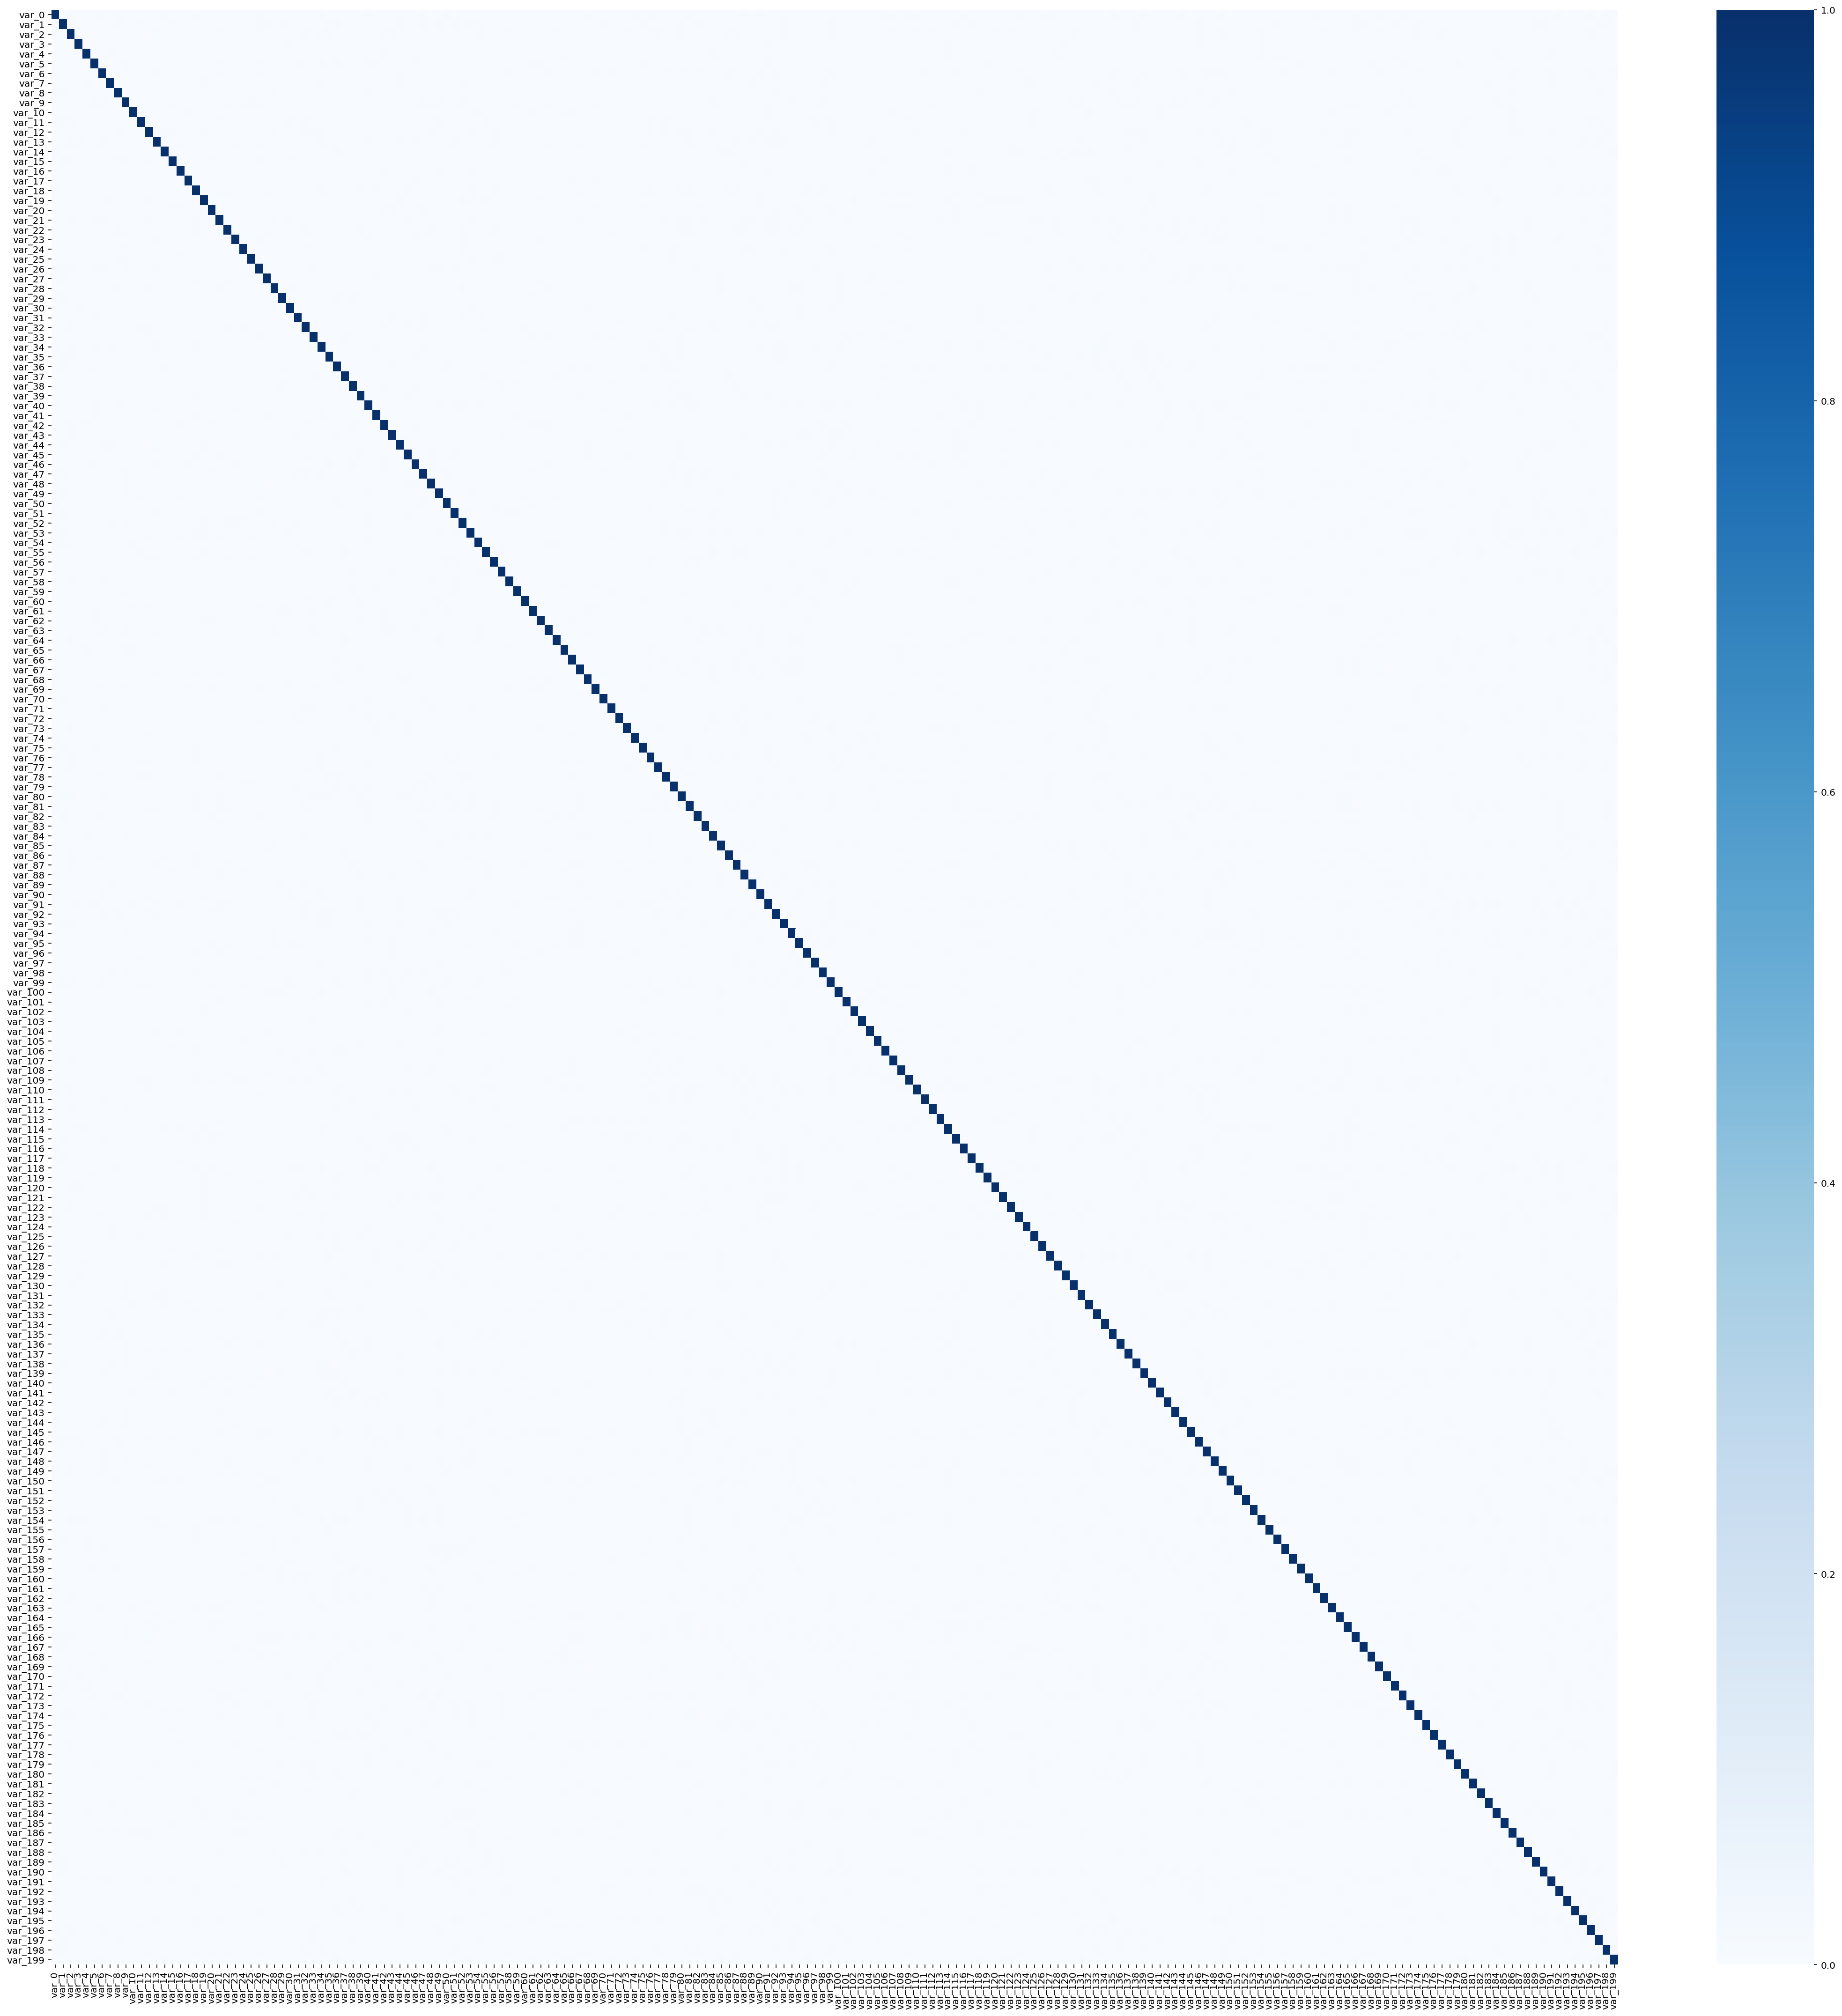

In [68]:
plt.figure(figsize=(30, 30))
sns.heatmap(corrs.abs(), cmap=plt.cm.Blues, xticklabels=features.columns.tolist(), yticklabels=features.columns.tolist())
plt.tight_layout()
plt.savefig('../mnt/figs/corrs.png')

In [69]:
# 相関を２畳してとってみる
pow_df = pd.DataFrame()
for col in tqdm(features.columns):
    pow_df[col + '_pow'] = features[col] ** 2
corrs = pow_df.corr()
corrs.head()

var_0_pow  var_1_pow  var_2_pow  var_3_pow  var_4_pow  var_5_pow  \
var_0_pow   1.000000   0.002088   0.007663   0.003025   0.001228  -0.002000   
var_1_pow   0.002088   1.000000  -0.001339   0.000099  -0.002034  -0.000885   
var_2_pow   0.007663  -0.001339   1.000000   0.001915   0.001295   0.000575   
var_3_pow   0.003025   0.000099   0.001915   1.000000  -0.000547   0.001381   
var_4_pow   0.001228  -0.002034   0.001295  -0.000547   1.000000   0.001322   

           var_6_pow  var_7_pow  var_8_pow  var_9_pow  var_10_pow  var_11_pow  \
var_0_pow   0.007805   0.002732   0.004337  -0.002994    0.004148   -0.002021   
var_1_pow  -0.003459   0.000608  -0.001262  -0.000266    0.004638    0.001008   
var_2_pow   0.001396  -0.000609  -0.001008  -0.002124    0.000745   -0.001594   
var_3_pow  -0.000901   0.002695   0.002298  -0.001532    0.002087   -0.000131   
var_4_pow   0.000273   0.003933  -0.003366  -0.000867   -0.000216   -0.002720   

           var_12_pow  var_13_pow  var_14_pow    var_15_pow  var_16_pow  \
var_0_pow   -0.002323   -0.002610   -0.004418  5.820204e-07    0.001837   
var_1_pow   -0.002301    0.001358   -0.001431 -2.548393e-03    0.000066   
var_2_pow   -0.004613   -0.008443   -0.002858  4.461874e-03   -0.000082   
var_3_pow   -0.001654   -0.005970   -0.000872  3.367828e-03    0.002846   
var_4_pow    0.000439    0.002762   -0.000765 -5.042761e-04    0.001610   

           var_17_pow  var_18_pow  var_19_pow  var_20_pow  var_21_pow  \
var_0_pow    0.003608    0.004415    0.001781   -0.000055   -0.000424   
var_1_pow    0.000767    0.002696    0.000013   -0.000145    0.000431   
var_2_pow   -0.000300    0.003446    0.001671    0.002901   -0.004655   
var_3_pow   -0.000778    0.001237   -0.000990    0.002918    0.001111   
var_4_pow    0.000391    0.001663    0.000077   -0.000173    0.000905   

           var_22_pow  var_23_pow  var_24_pow  var_25_pow  var_26_pow  \
var_0_pow    0.004144   -0.001241    0.004418    0.001615    0.000023   
var_1_pow    0.000925    0.000317    0.000207   -0.001957    0.000834   
var_2_pow    0.001965    0.002044    0.003038   -0.000216   -0.002848   
var_3_pow   -0.003308    0.001468   -0.001964   -0.002428    0.000372   
var_4_pow   -0.001580    0.002197    0.003086    0.001667    0.002348   

           var_27_pow  var_28_pow  var_29_pow  var_30_pow  var_31_pow  \
var_0_pow   -0.002544    0.000452   -0.000189   -0.004756   -0.002277   
var_1_pow   -0.001043    0.000863   -0.001499   -0.002673    0.000615   
var_2_pow    0.000647   -0.000624    0.000418   -0.001415   -0.002802   
var_3_pow   -0.001267   -0.003799    0.000544   -0.003197    0.002300   
var_4_pow   -0.001367    0.000111    0.001602   -0.000093   -0.001003   

           var_32_pow  var_33_pow  var_34_pow  var_35_pow  var_36_pow  \
var_0_pow   -0.000696   -0.002845   -0.004615    0.003881    0.000586   
var_1_pow   -0.002391   -0.004461   -0.000028    0.002442    0.002504   
var_2_pow   -0.000045    0.001622   -0.005003    0.006078    0.000216   
var_3_pow   -0.000625   -0.002120   -0.002021    0.002543    0.001019   
var_4_pow    0.002816    0.000896    0.001897   -0.002706    0.001392   

           var_37_pow  var_38_pow  var_39_pow  var_40_pow  var_41_pow  \
var_0_pow    0.000212   -0.001024   -0.000724   -0.003582    0.000070   
var_1_pow   -0.001455   -0.001923    0.003079   -0.000256   -0.002308   
var_2_pow   -0.001010   -0.001135   -0.001889   -0.001112    0.000523   
var_3_pow   -0.000129   -0.002793    0.003806   -0.000238    0.000532   
var_4_pow    0.001142   -0.001327   -0.002844   -0.001103    0.001731   

           var_42_pow  var_43_pow  var_44_pow  var_45_pow  var_46_pow  \
var_0_pow   -0.000489    0.002312   -0.001190   -0.000643    0.001275   
var_1_pow   -0.001316   -0.002215    0.003579   -0.004369    0.001770   
var_2_pow   -0.003865   -0.004181    0.002664   -0.004529    0.003848   
var_3_pow   -0.001666    0.000170    0.000009    0.002188    0.001463   
var_4_pow   -0.004241    0.000778    0

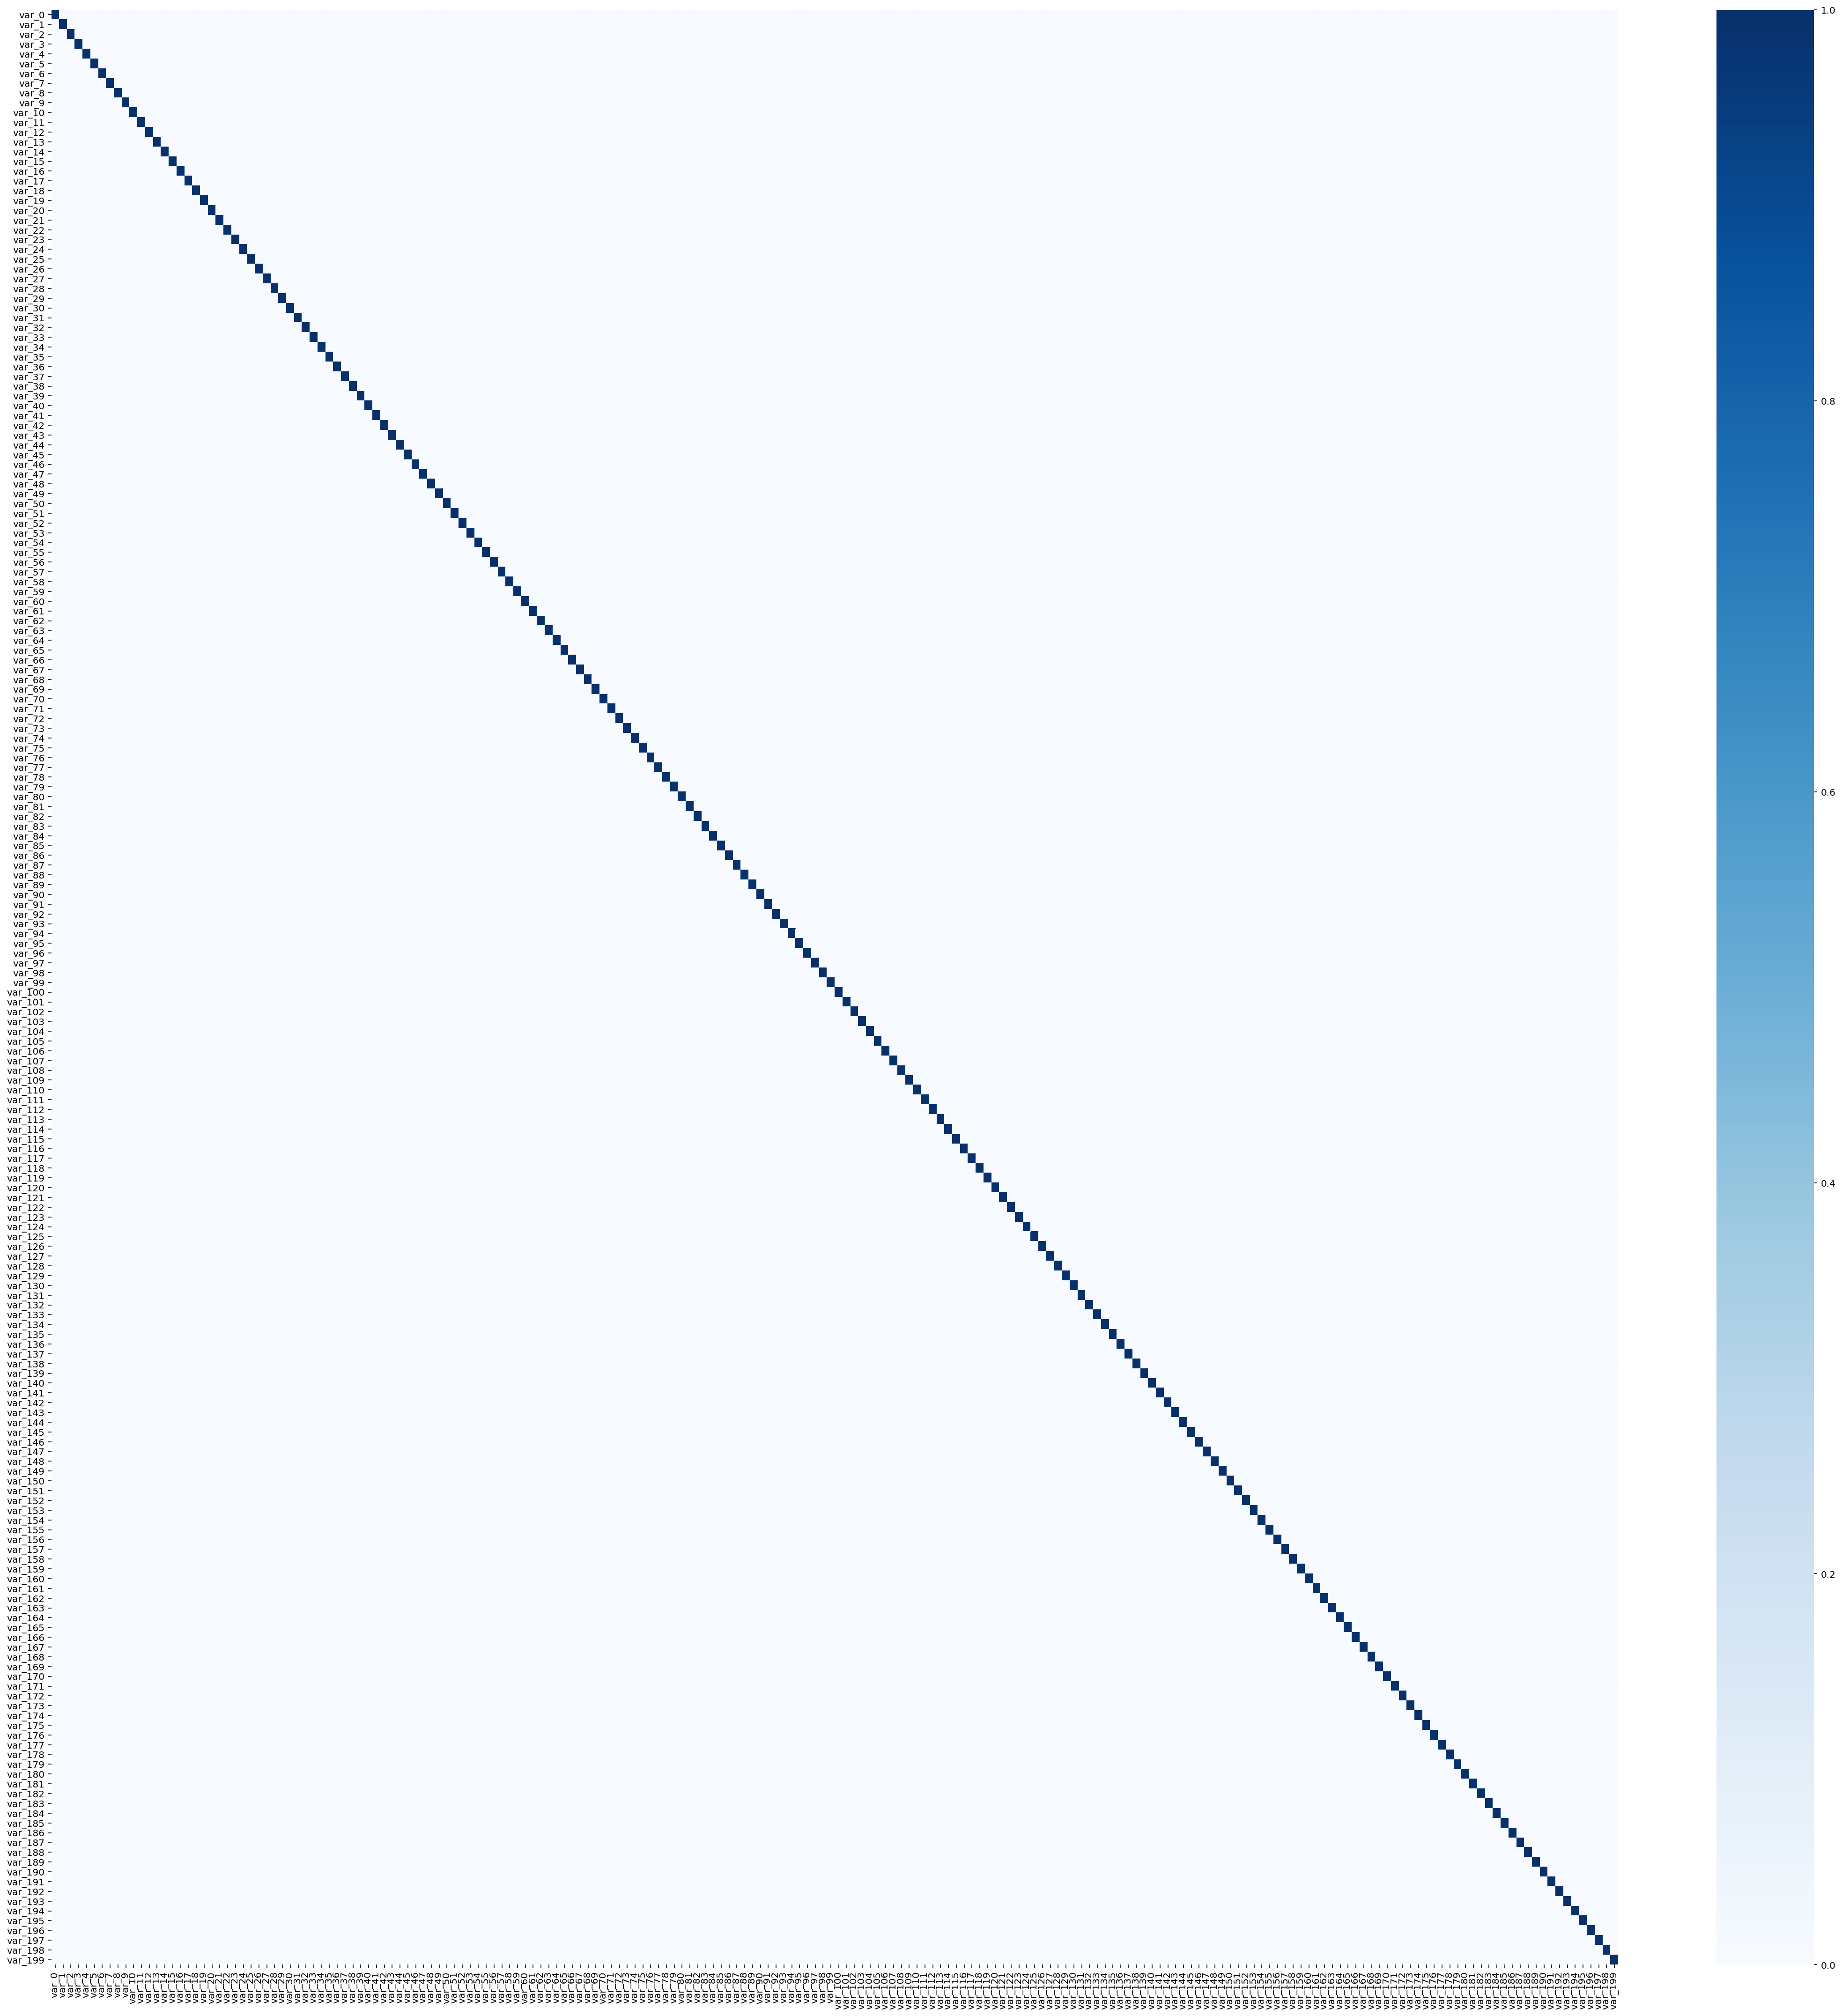

In [70]:
plt.figure(figsize=(30, 30))
sns.heatmap(corrs.abs(), cmap=plt.cm.Blues, xticklabels=features.columns.tolist(), yticklabels=features.columns.tolist())
plt.tight_layout()
plt.savefig('../mnt/figs/pow_corrs.png')

In [71]:
# median を引いて pow
med_pow_df = pd.DataFrame()
for col in tqdm(features.columns):
    med_pow_df[col + '_med_pow'] = (features[col] - features[col].median()) ** 2
corrs = med_pow_df.corr()
corrs.head()

var_0_med_pow  var_1_med_pow  var_2_med_pow  var_3_med_pow  \
var_0_med_pow       1.000000       0.002159       0.004273      -0.002639   
var_1_med_pow       0.002159       1.000000      -0.001578       0.000146   
var_2_med_pow       0.004273      -0.001578       1.000000       0.003173   
var_3_med_pow      -0.002639       0.000146       0.003173       1.000000   
var_4_med_pow       0.000121      -0.001118       0.001321      -0.004070   

               var_4_med_pow  var_5_med_pow  var_6_med_pow  var_7_med_pow  \
var_0_med_pow       0.000121       0.005019       0.001908       0.000078   
var_1_med_pow      -0.001118      -0.000962       0.002616      -0.000976   
var_2_med_pow       0.001321       0.000555      -0.000339       0.002619   
var_3_med_pow      -0.004070       0.003976      -0.002803      -0.001913   
var_4_med_pow       1.000000       0.000950       0.004664       0.000831   

               var_8_med_pow  var_9_med_pow  var_10_med_pow  var_11_med_pow  \
var_0_med_pow       0.003360       0.001960        0.002326       -0.001195   
var_1_med_pow       0.000600      -0.000299        0.003926       -0.002344   
var_2_med_pow      -0.001707       0.004411        0.003113        0.001211   
var_3_med_pow      -0.001904       0.000561        0.003073       -0.001186   
var_4_med_pow       0.001119       0.001004       -0.002768        0.000180   

               var_12_med_pow  var_13_med_pow  var_14_med_pow  var_15_med_pow  \
var_0_med_pow        0.006701        0.001528       -0.004291       -0.000165   
var_1_med_pow        0.003712        0.003425        0.002151        0.002044   
var_2_med_pow        0.005611        0.006240       -0.000806       -0.004626   
var_3_med_pow       -0.000863        0.000858        0.002682       -0.001165   
var_4_med_pow        0.002329       -0.002558        0.003329       -0.000889   

               var_16_med_pow  var_17_med_pow  var_18_med_pow  var_19_med_pow  \
var_0_med_pow        0.006221        0.001448       -0.000493       -0.004244   
var_1_med_pow       -0.001851        0.000545        0.002094        0.001476   
var_2_med_pow        0.000210        0.001807        0.000405        0.001776   
var_3_med_pow        0.003702        0.000504        0.000908       -0.001277   
var_4_med_pow        0.000697       -0.002348       -0.000291        0.000361   

               var_20_med_pow  var_21_med_pow  var_22_med_pow  var_23_med_pow  \
var_0_med_pow        0.002212       -0.002878        0.005626       -0.001382   
var_1_med_pow       -0.002931        0.000511       -0.000651        0.001084   
var_2_med_pow        0.004667        0.006362        0.003644        0.000652   
var_3_med_pow        0.000347        0.001919        0.002950        0.002300   
var_4_med_pow       -0.000928       -0.001277        0.001767       -0.001472   

               var_24_med_pow  var_25_med_pow  var_26_med_pow  var_27_med_pow  \
var_0_med_pow        0.003053        0.002025        0.000425       -0.003831   
var_1_med_pow        0.002056        0.001959       -0.004120       -0.001198   
var_2_med_pow        0.002459        0.004465        0.001642        0.002316   
var_3_med_pow       -0.000193       -0.000023        0.002351        0.000043   
var_4_med_pow        0.005006        0.003248       -0.000859       -0.000760   

               var_28_med_pow  var_29_med_pow  var_30_med_pow  var_31_med_pow  \
var_0_med_pow        0.002911        0.000196        0.000306       -0.000150   
var_1_med_pow       -0.001779       -0.000775        0.000911        0.000834   
var_2_med_pow        0.000967        0.002356        0.000769        0.000338   
var_3_med_pow       -0.000876        0.000471        0.001881        0.001006   
var_4_med_pow       -0.001815       -0.000580        0.002495       -0.001722   

               var_32_med_pow  var_33_med_pow  var_34_med_pow  var_35_med_pow  \
var_0_med_pow       -0.001218        0.003660        0.000722        0.004062   
var_1_med_pow    

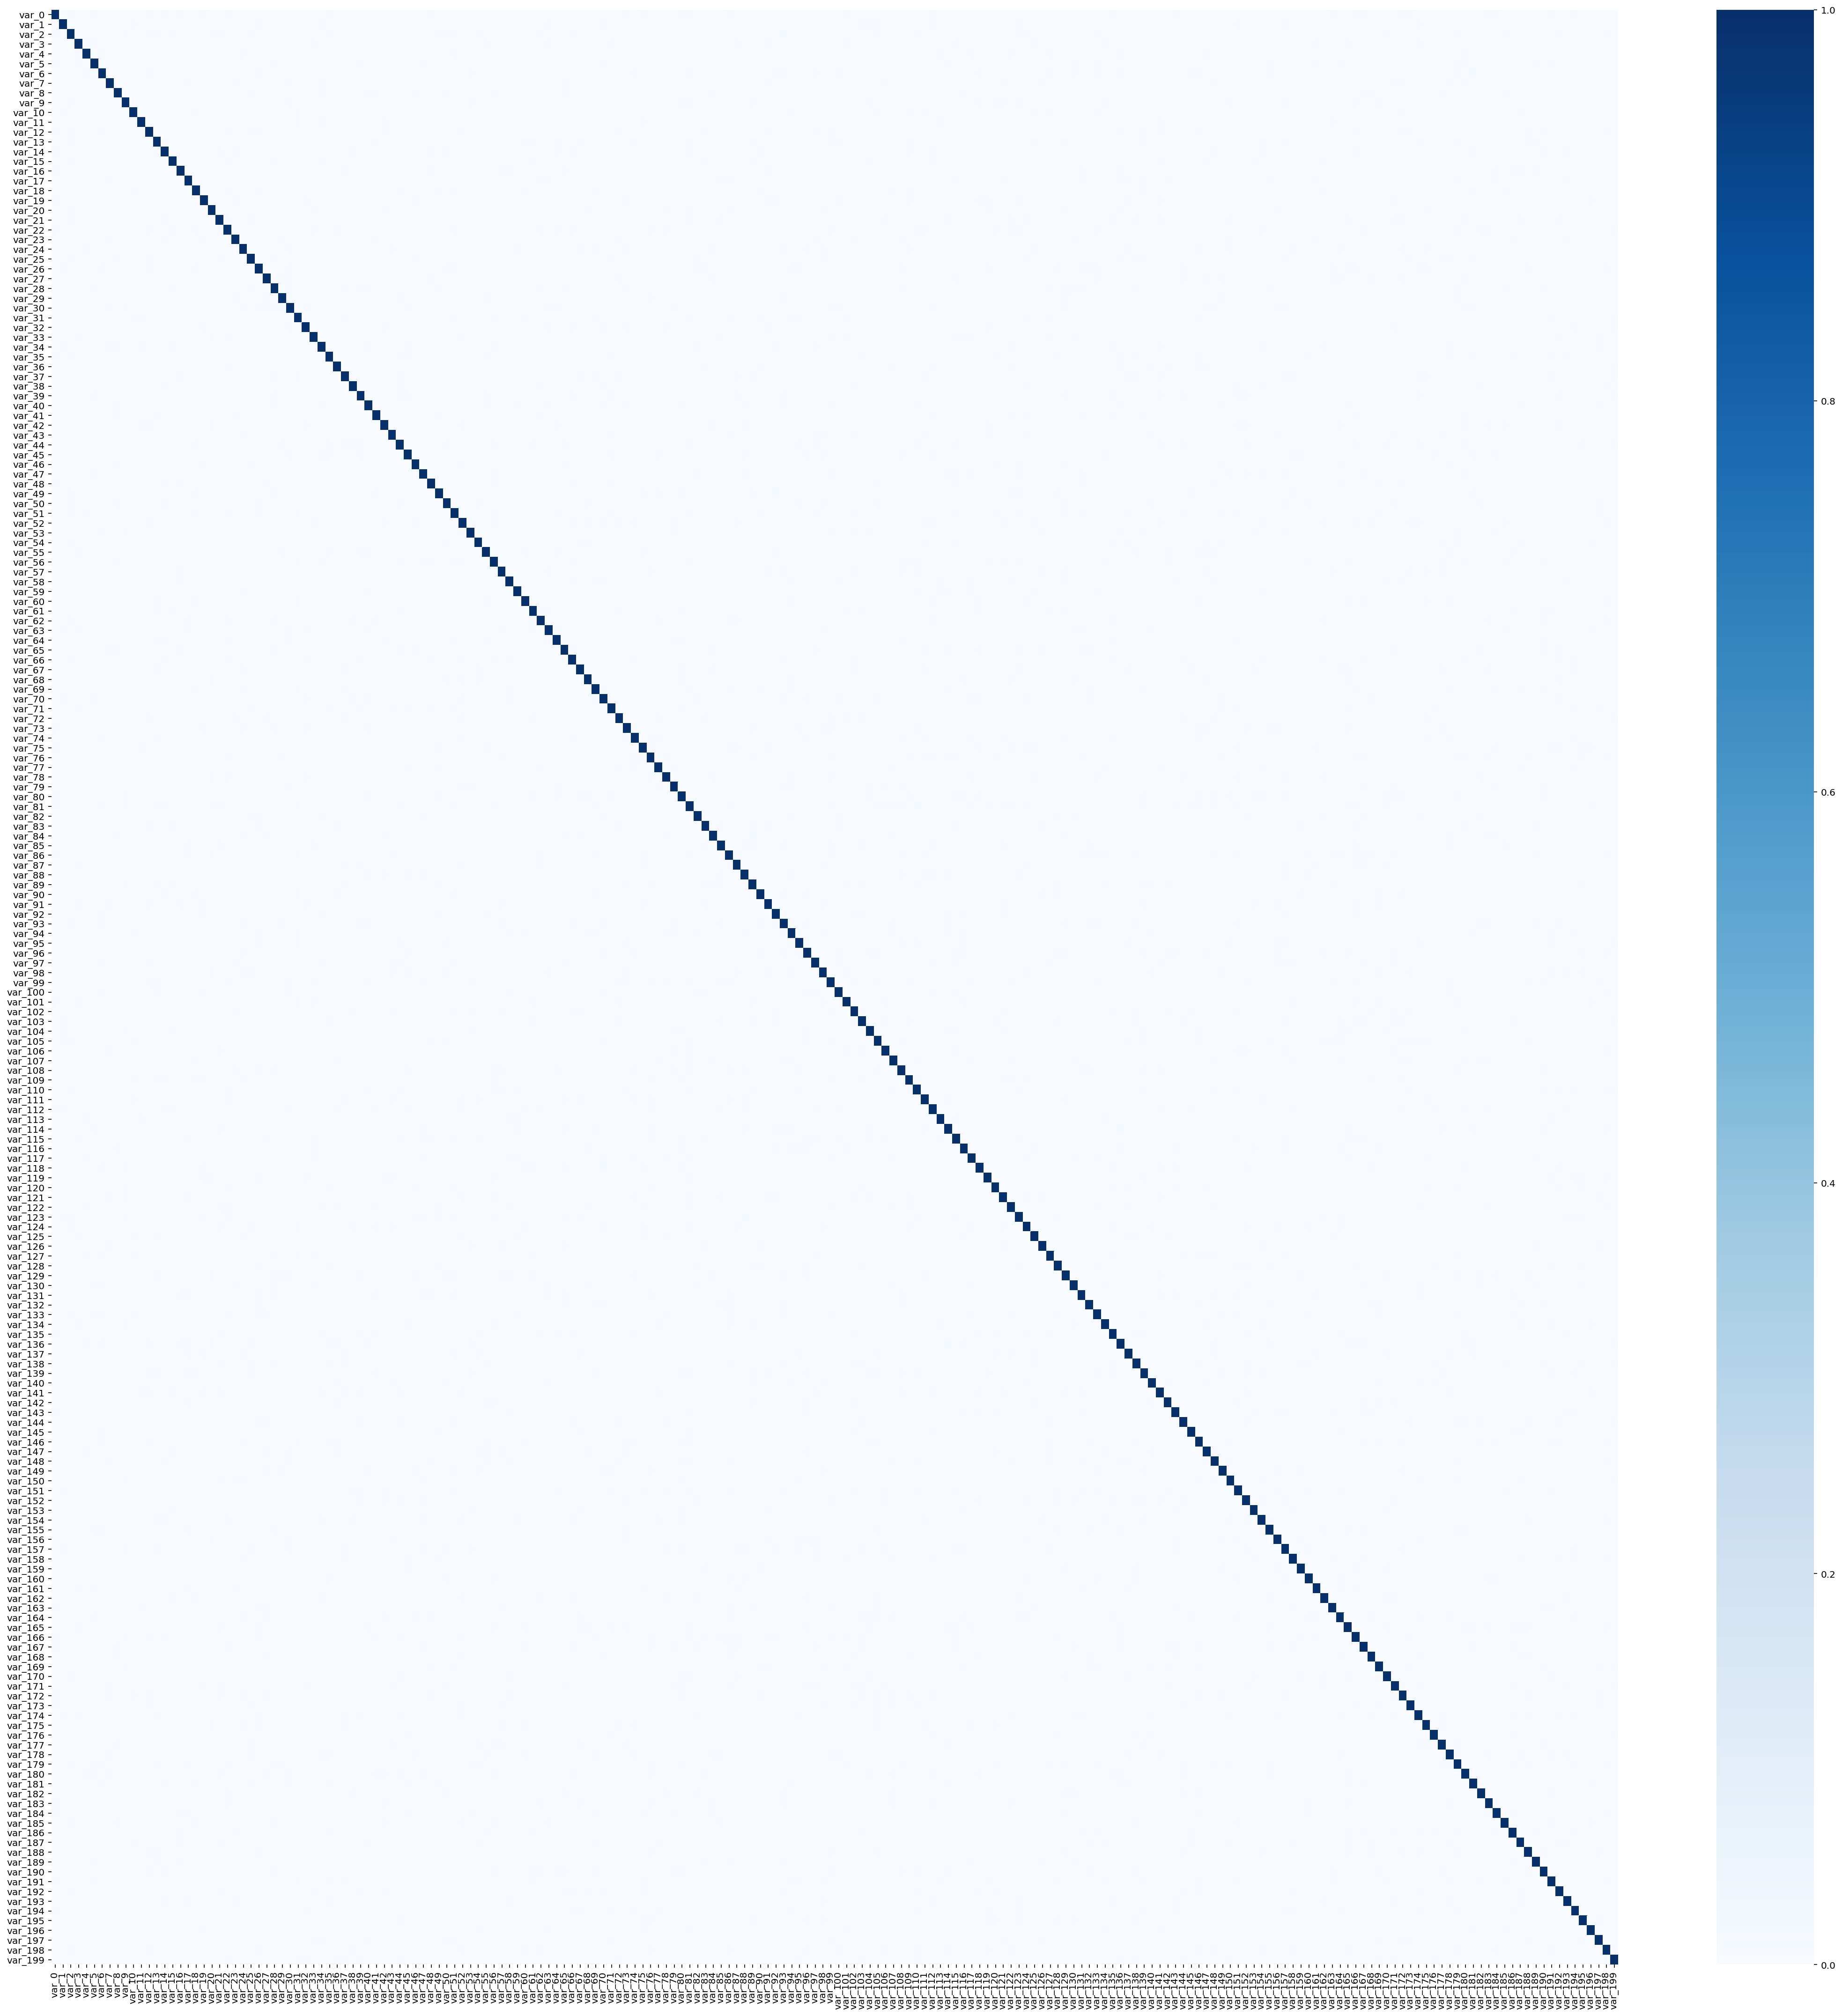

In [72]:
plt.figure(figsize=(30, 30))
sns.heatmap(corrs.abs(), cmap=plt.cm.Blues, xticklabels=features.columns.tolist(), yticklabels=features.columns.tolist())
plt.tight_layout()
plt.savefig('../mnt/figs/med_pow_corrs.png')

In [74]:
# power 系がどんな感じか見てみる
sys.path.append('../')
from tools.utils.visualizations import num_feature_comp_hist

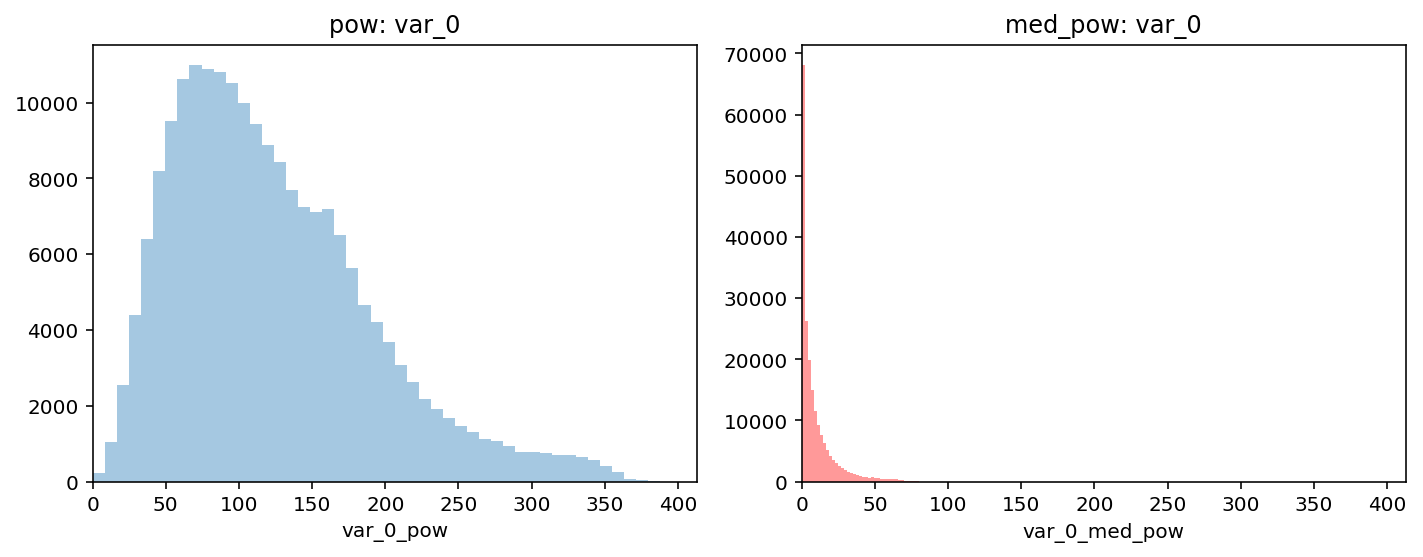

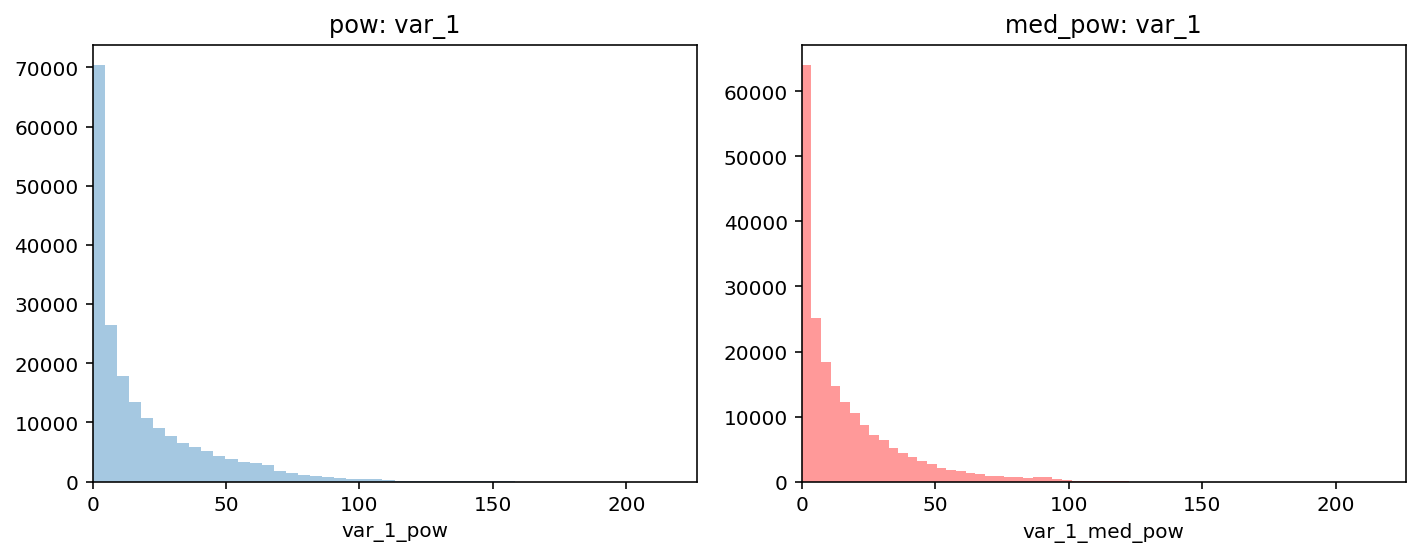

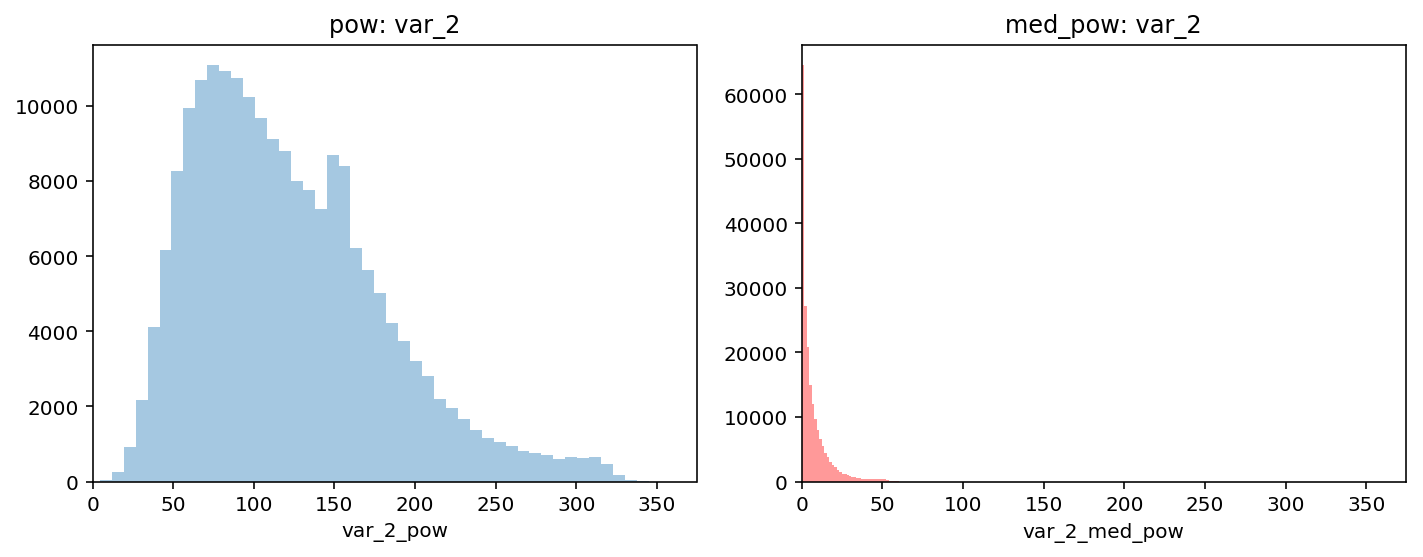

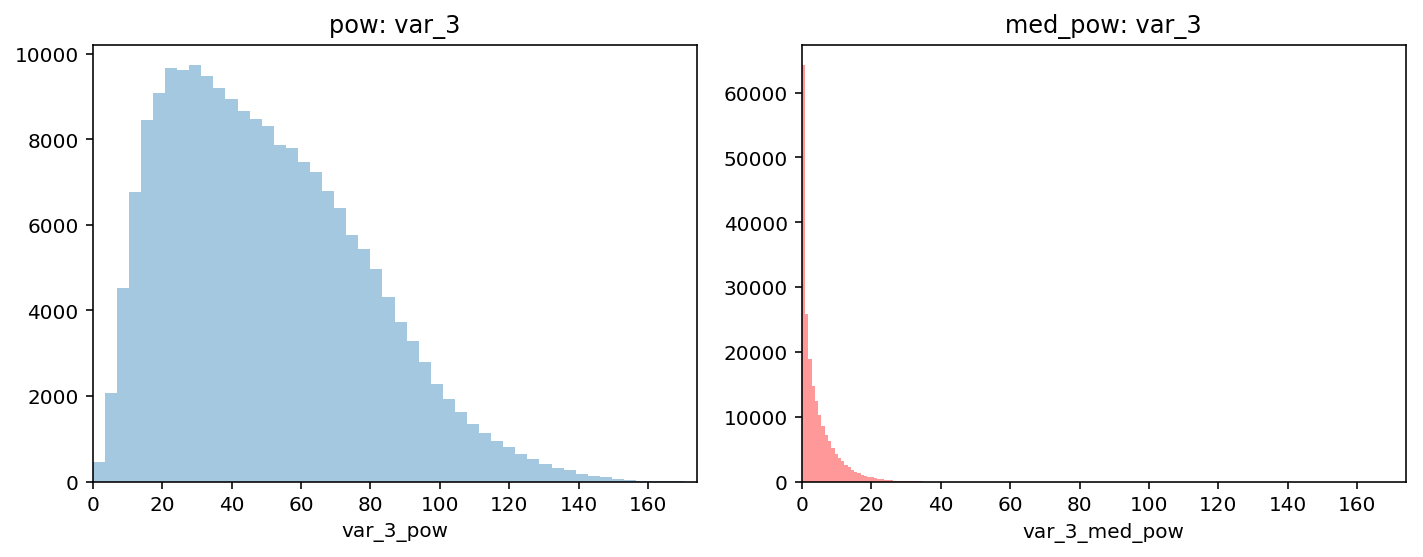

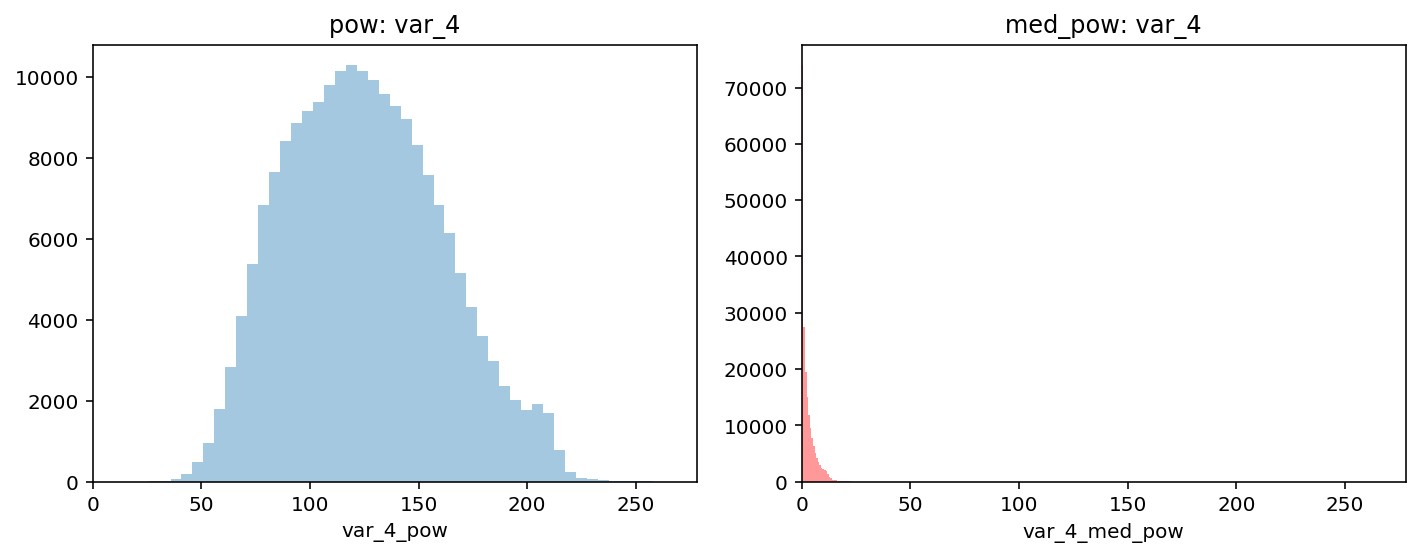

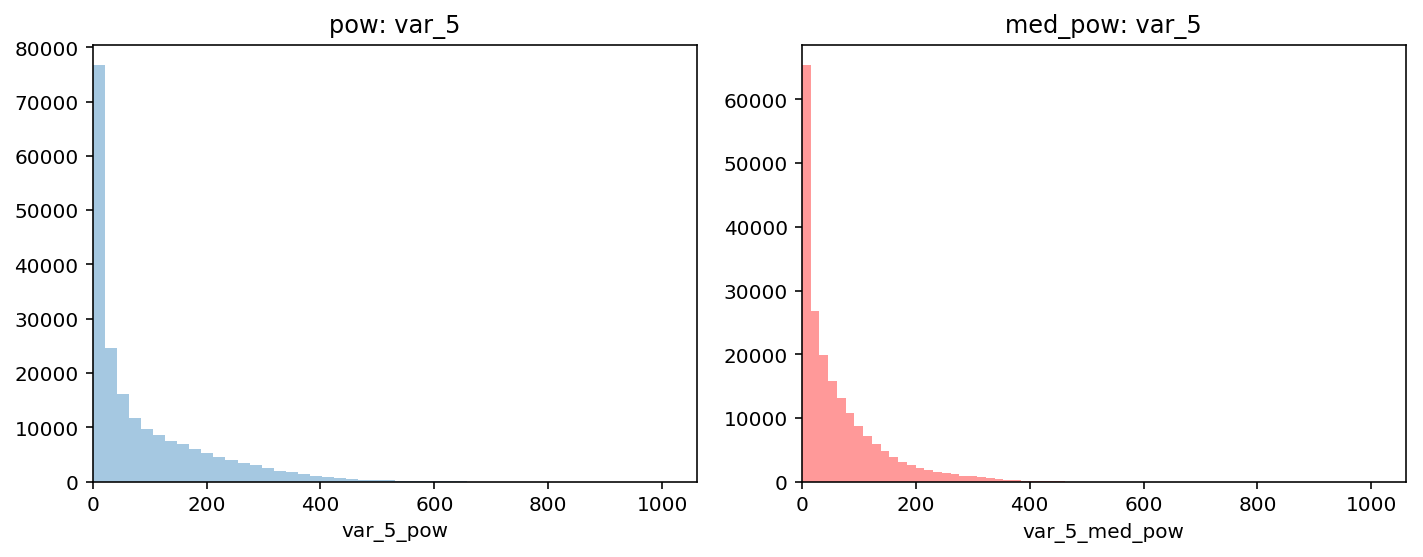

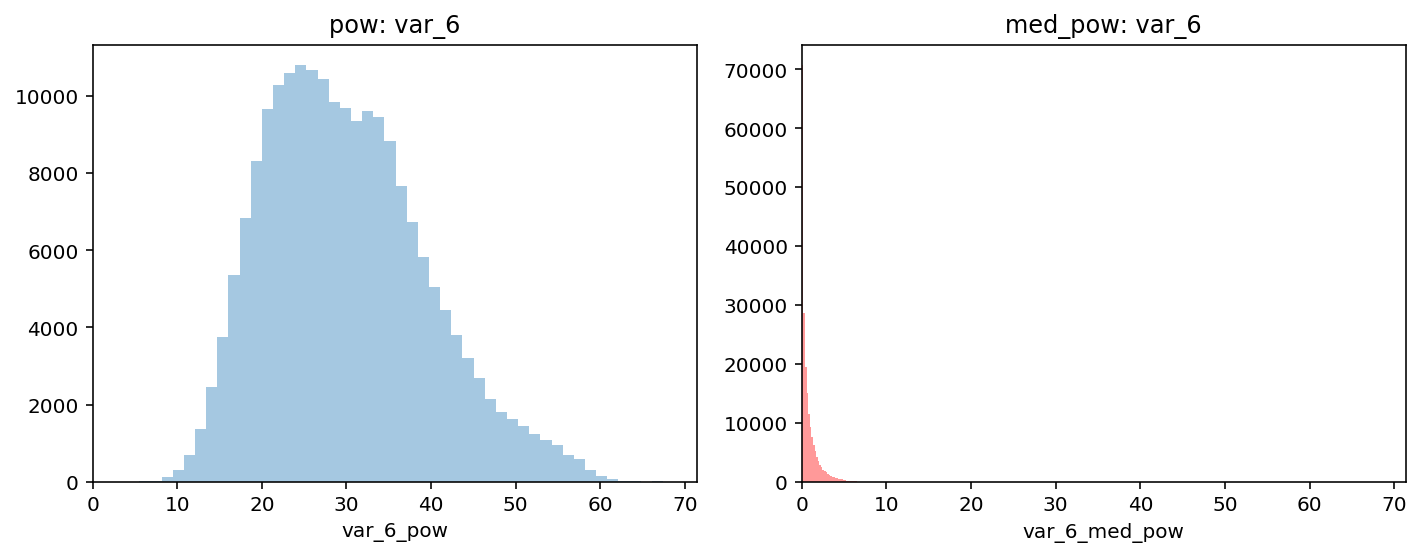

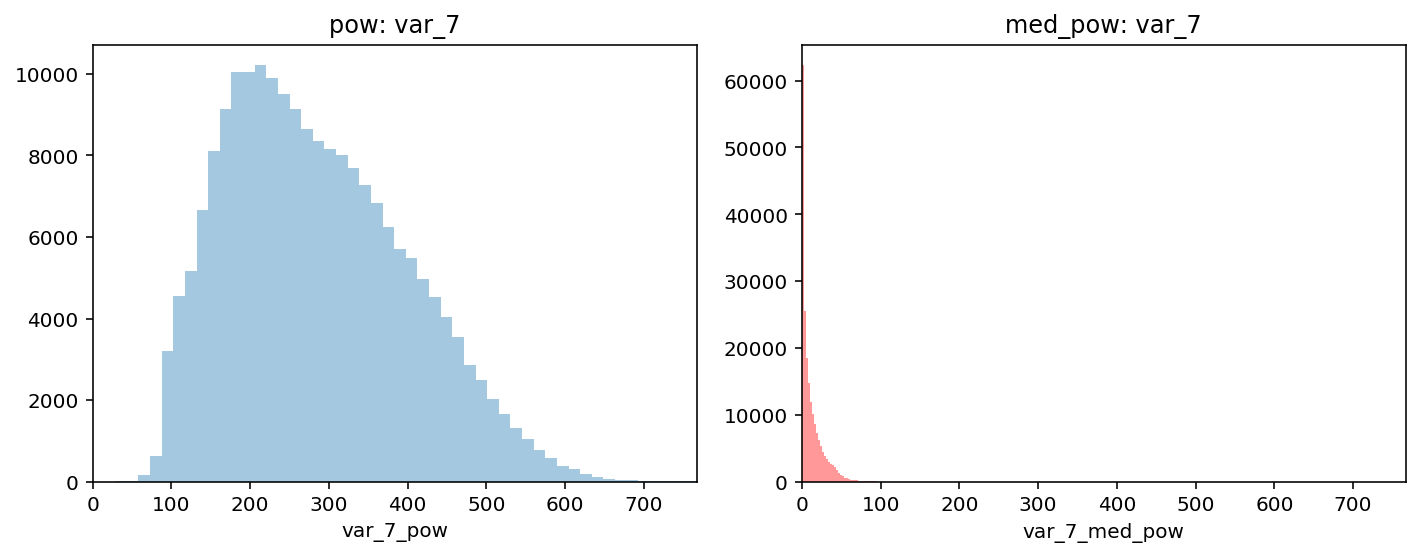

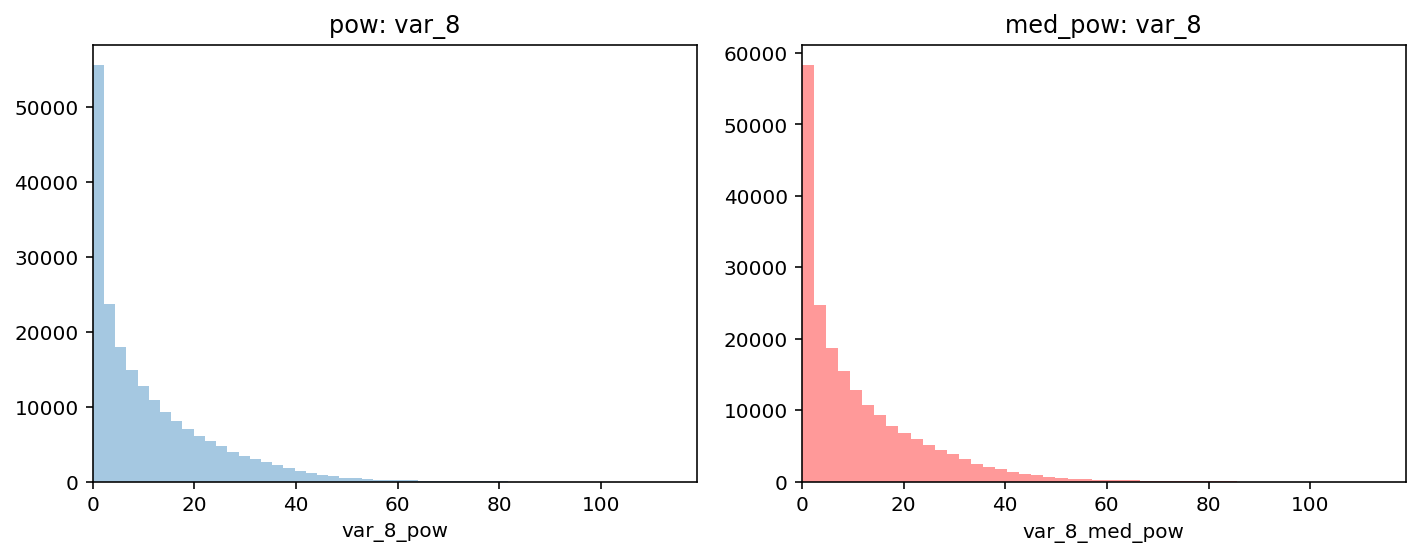

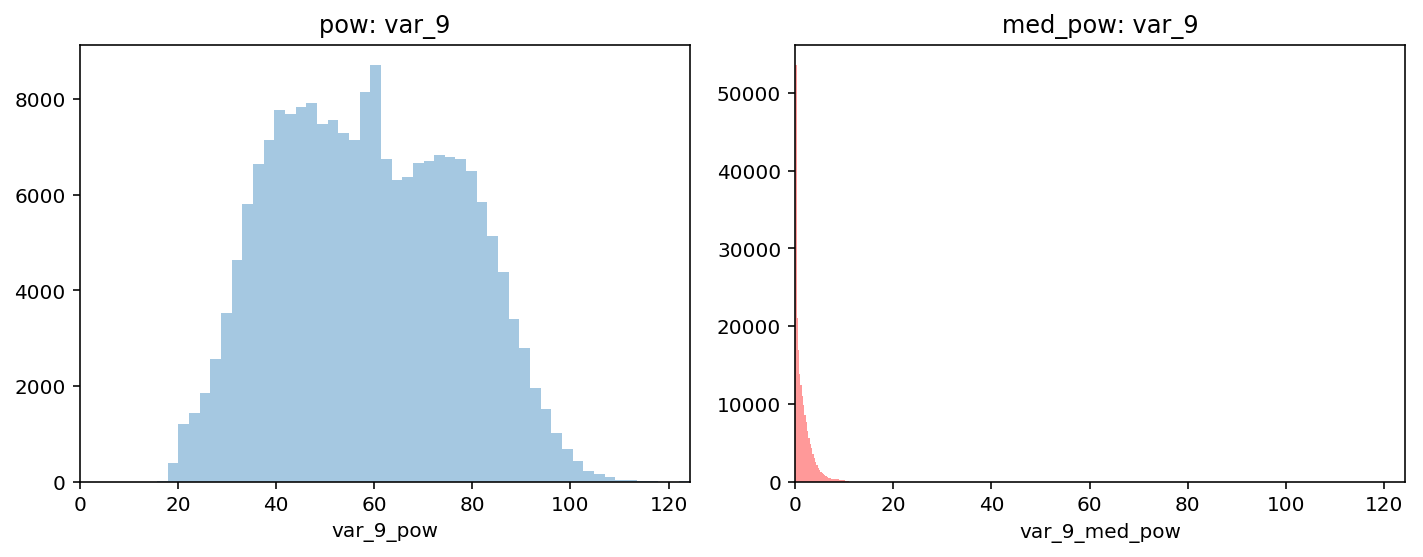

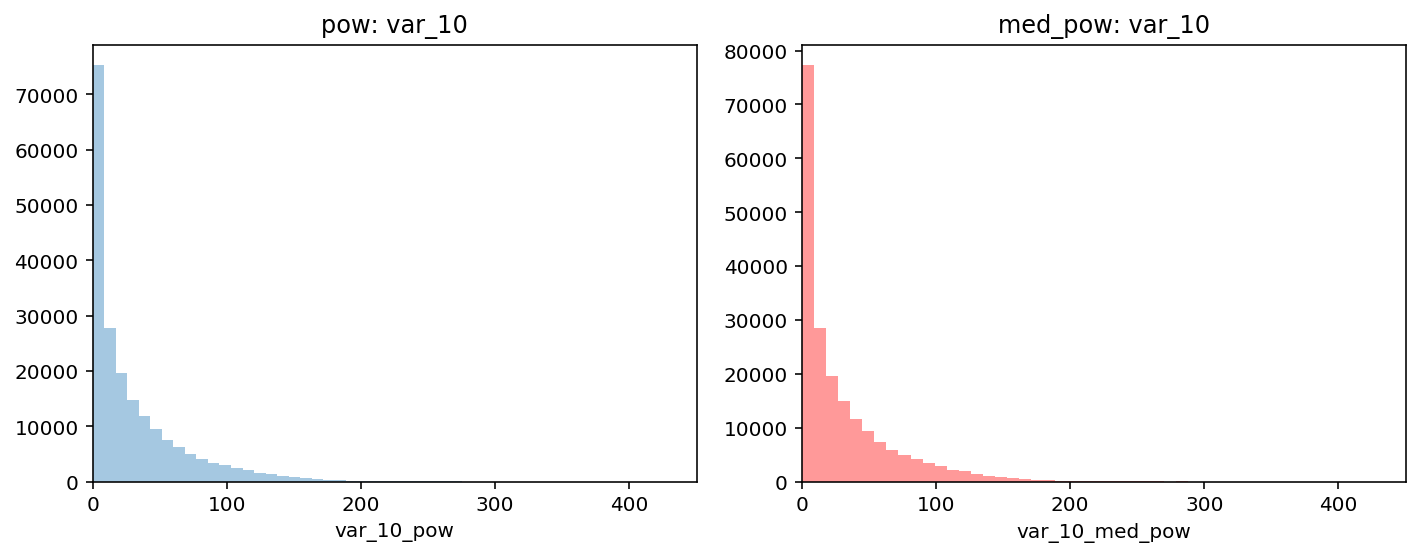

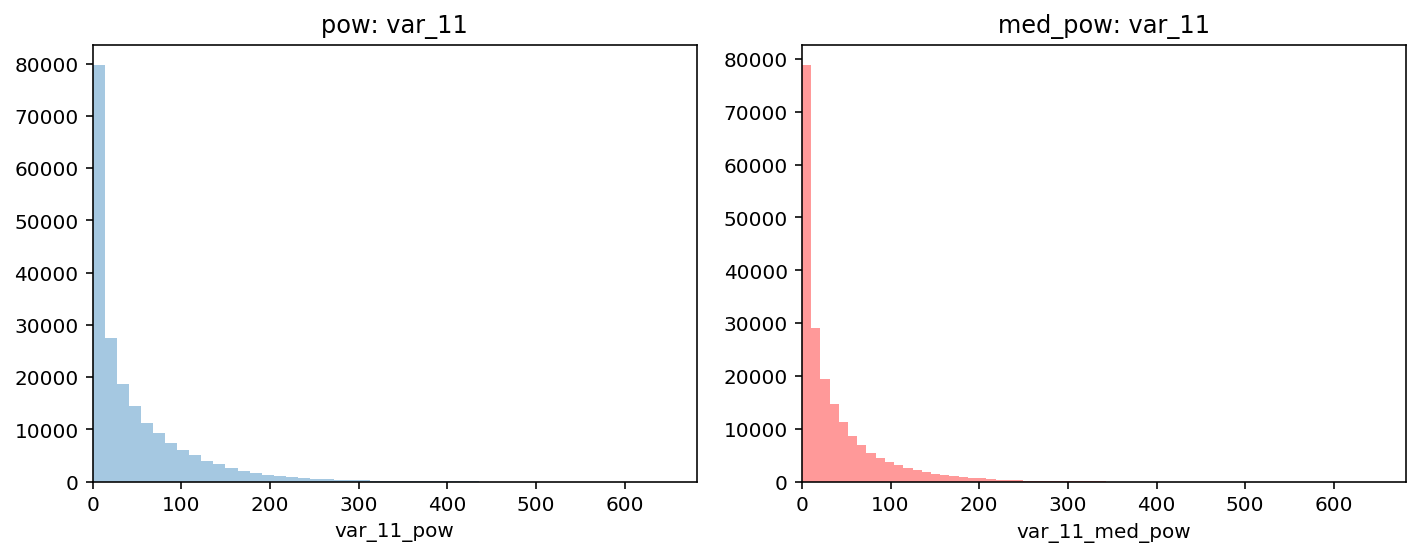

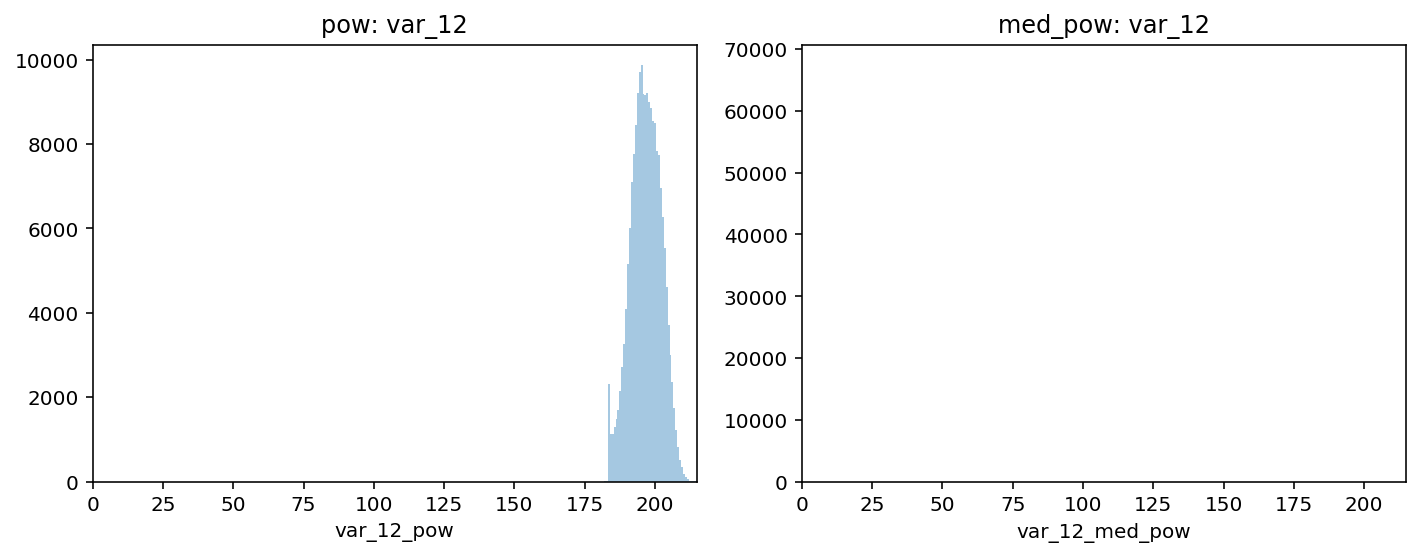

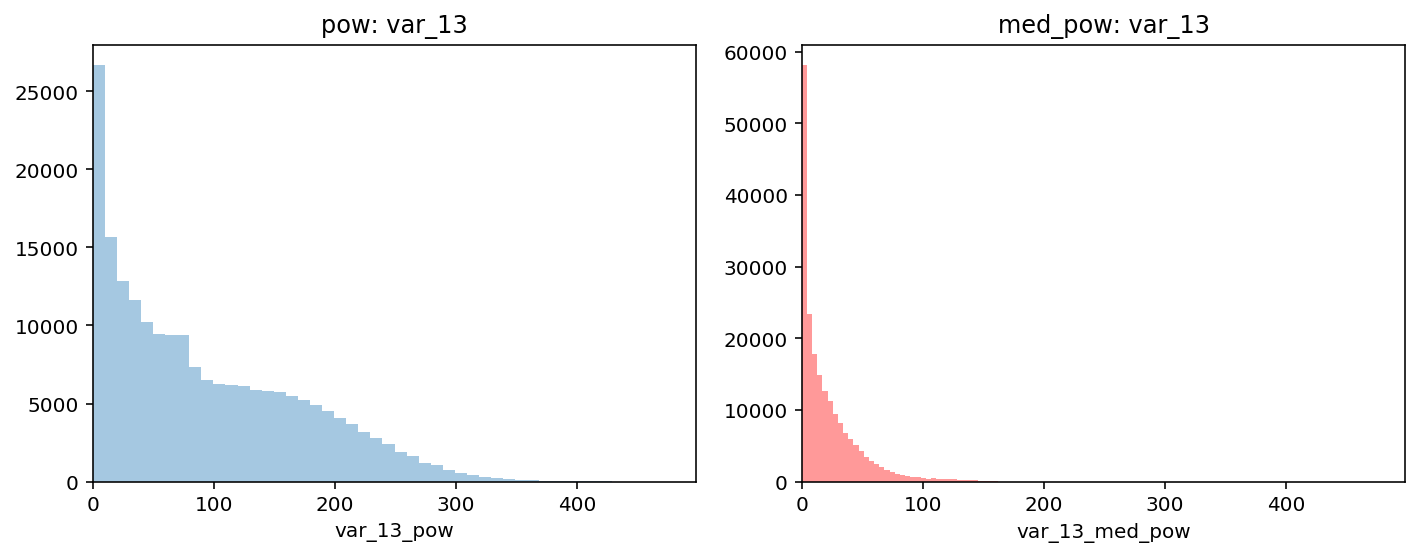

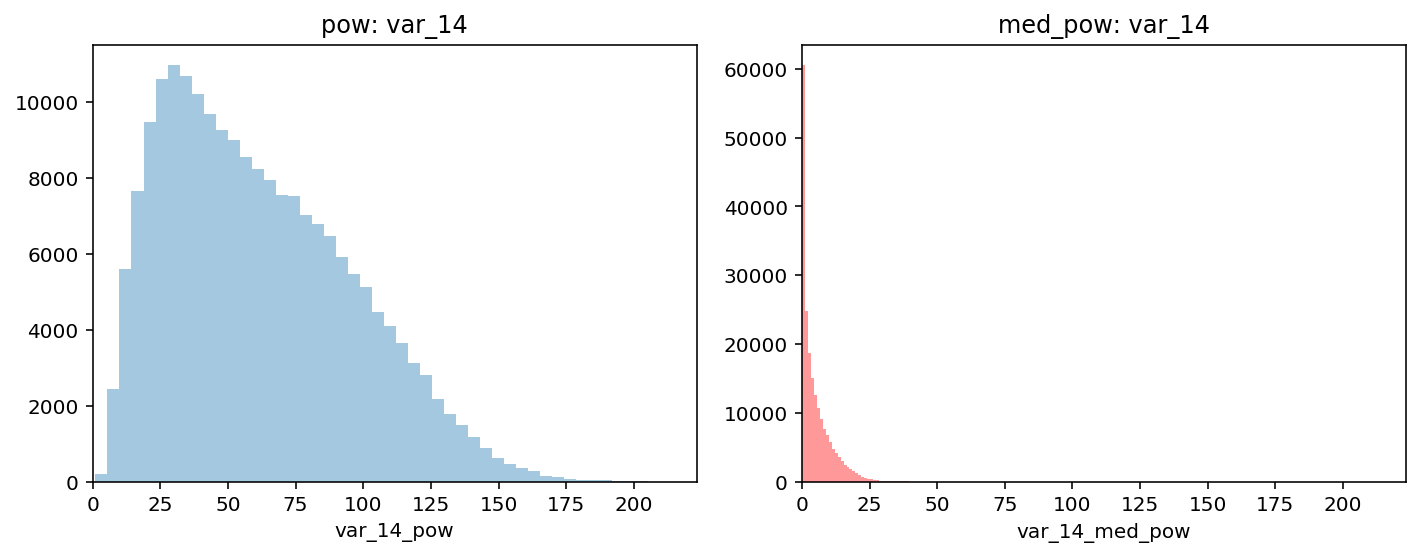

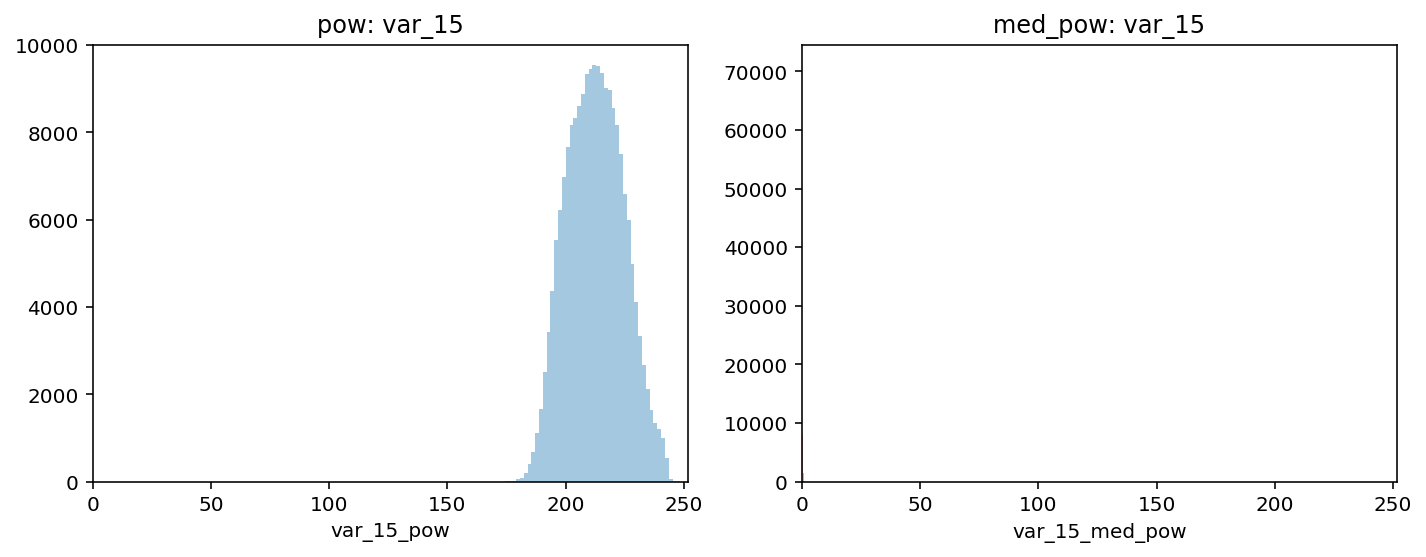

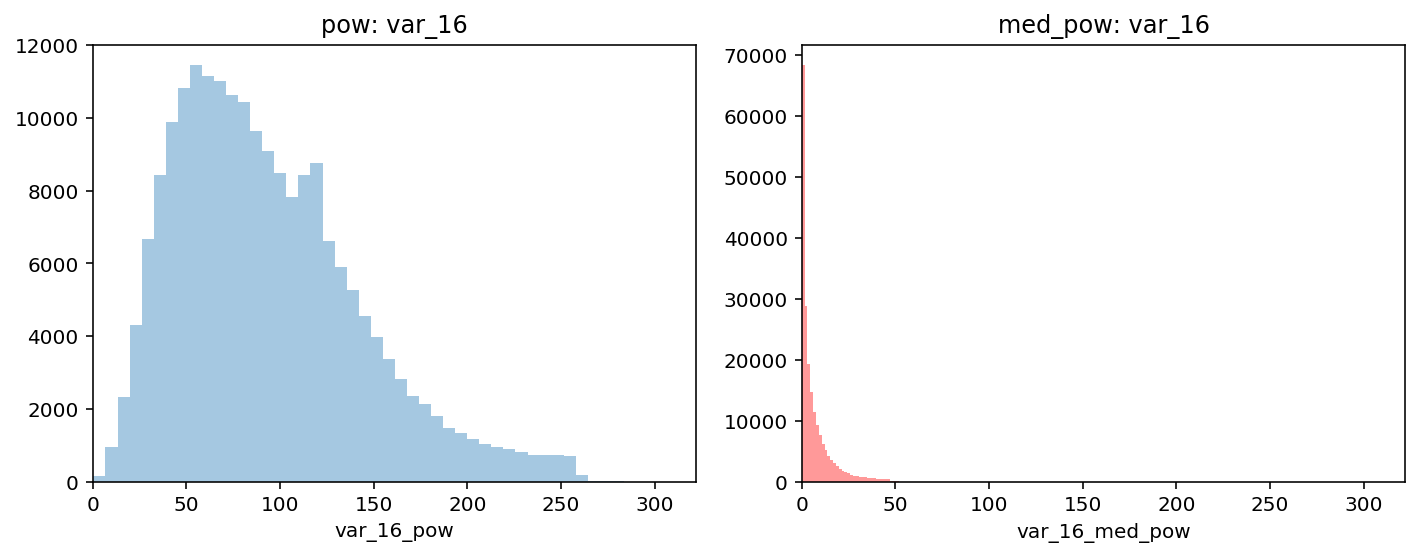

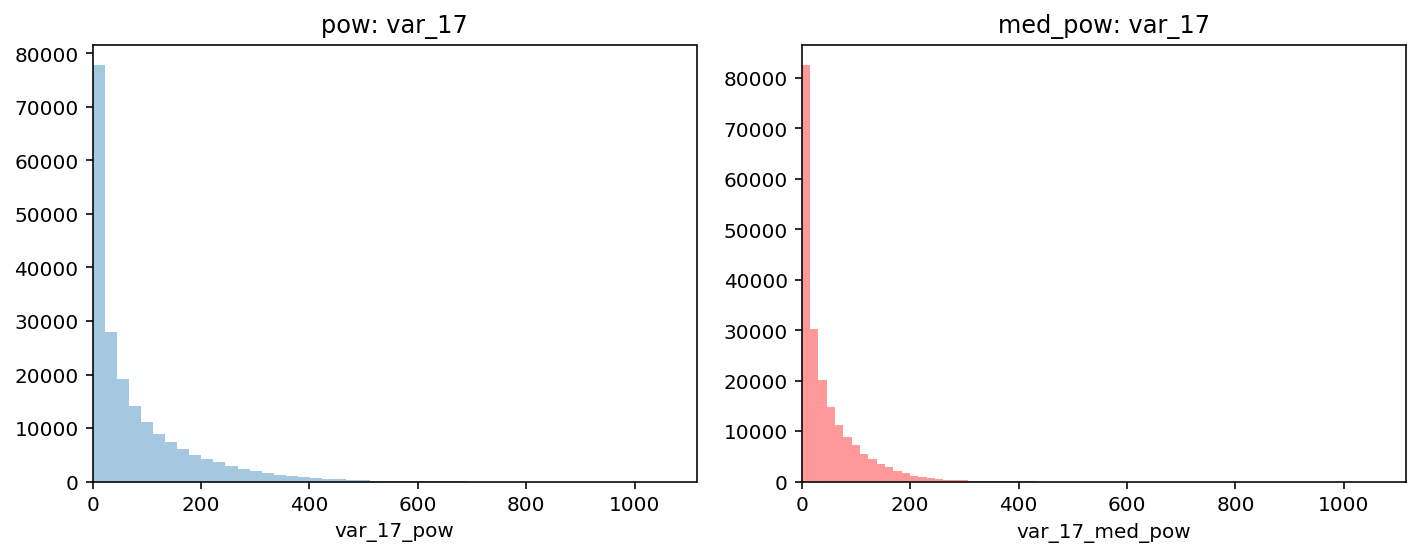

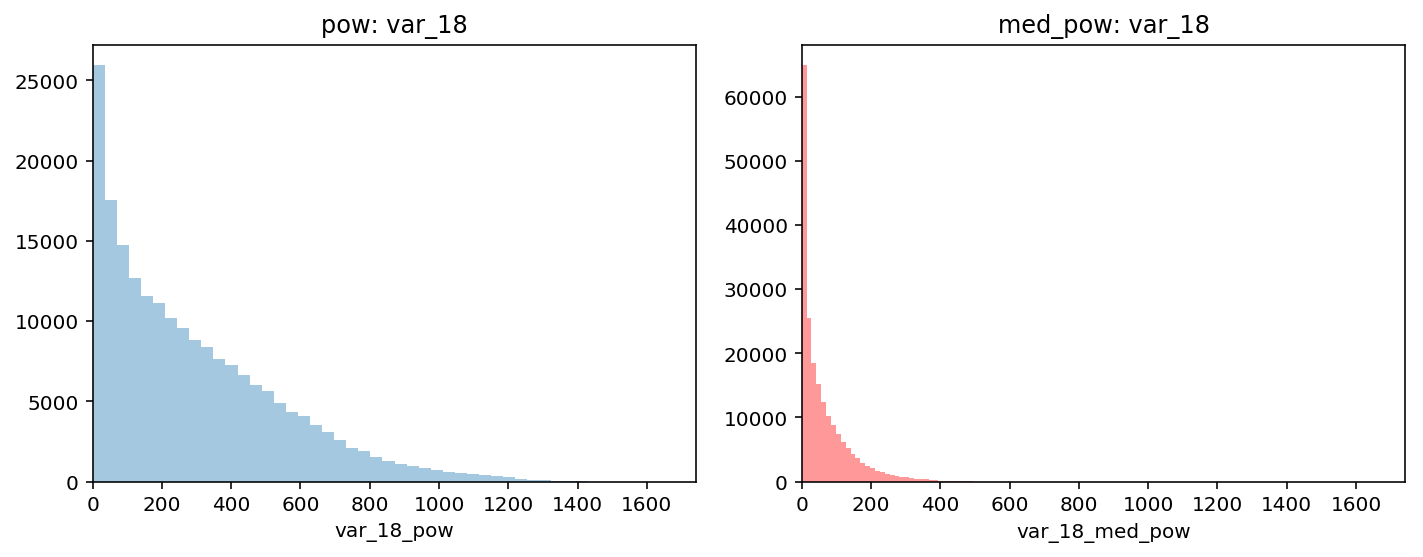

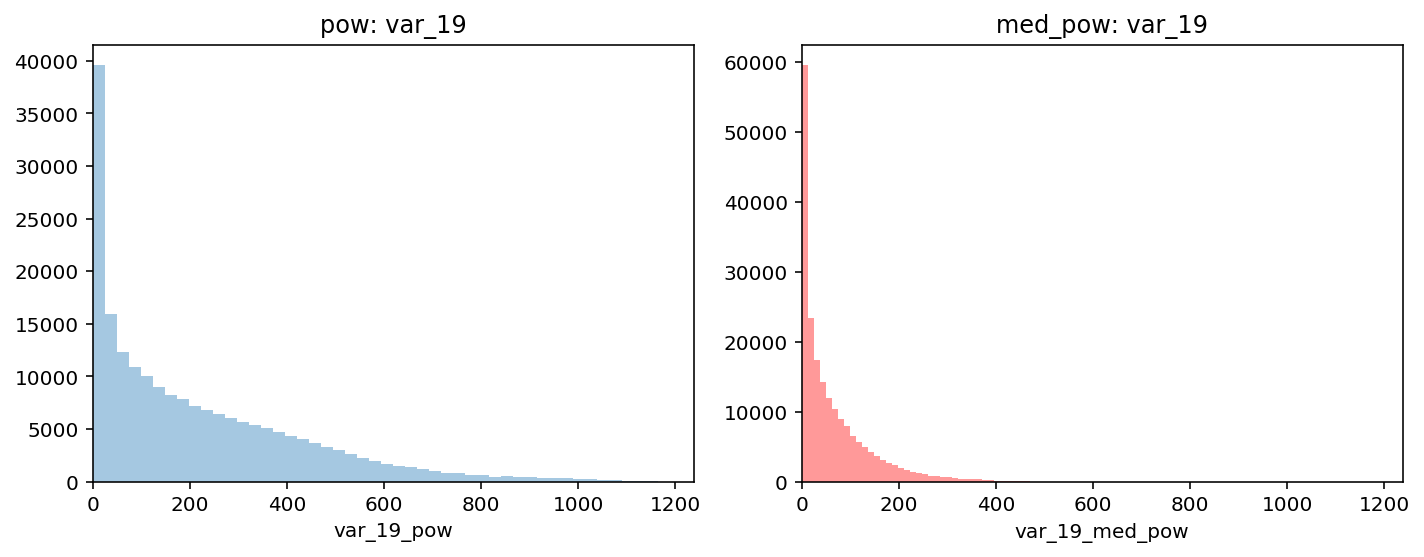

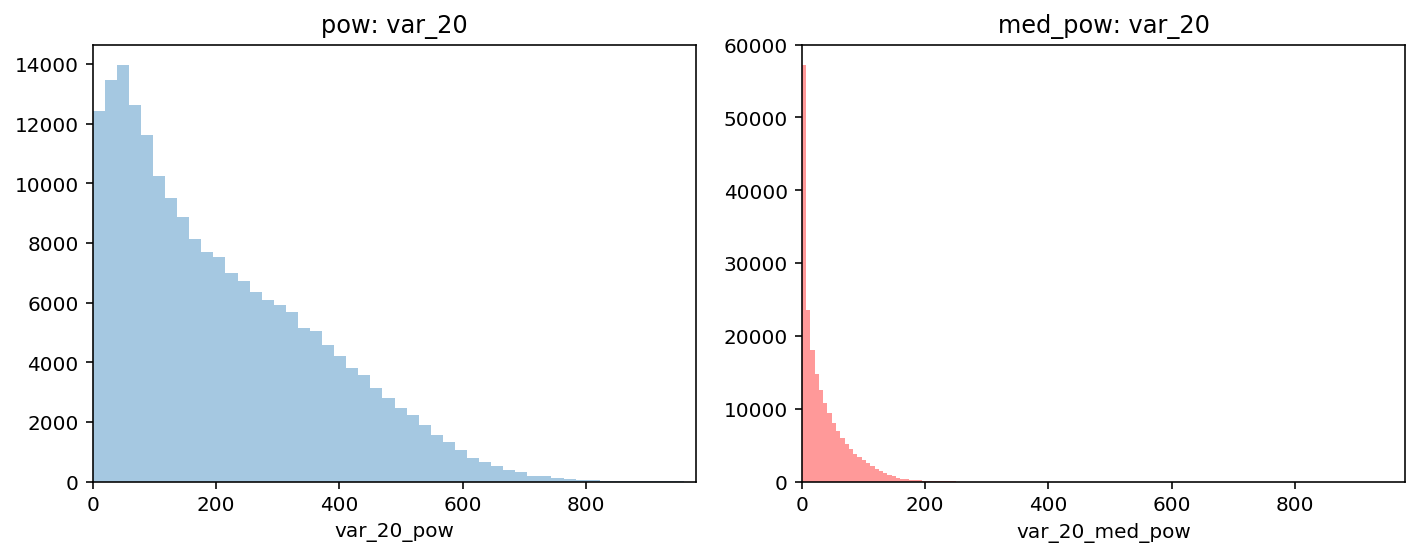

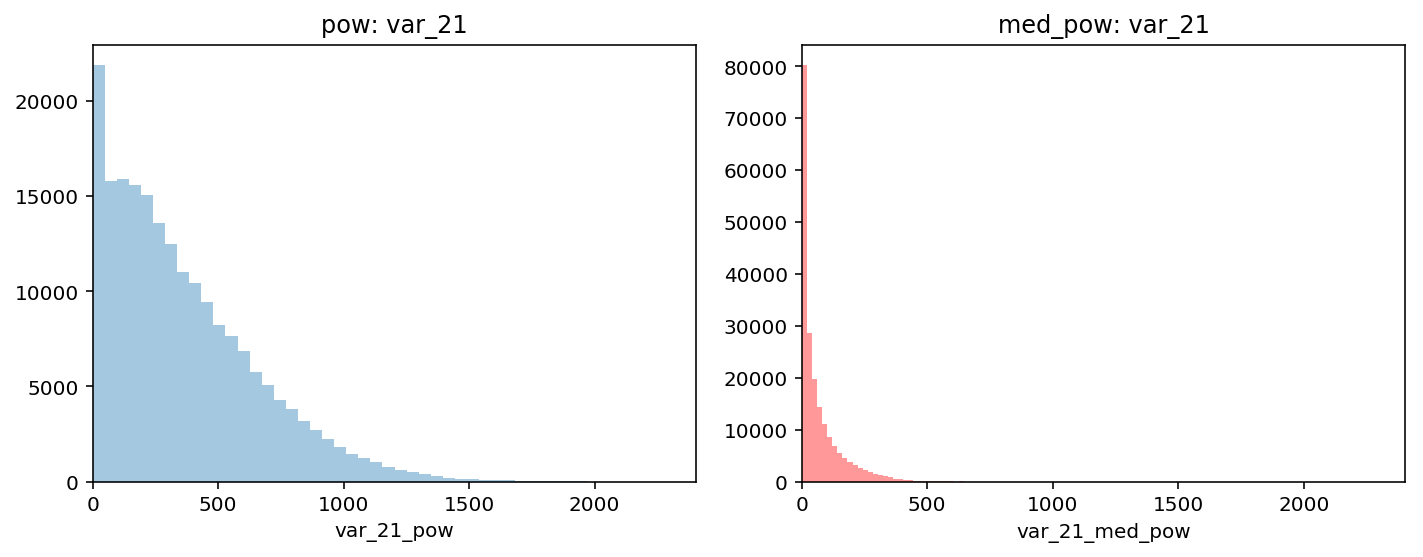

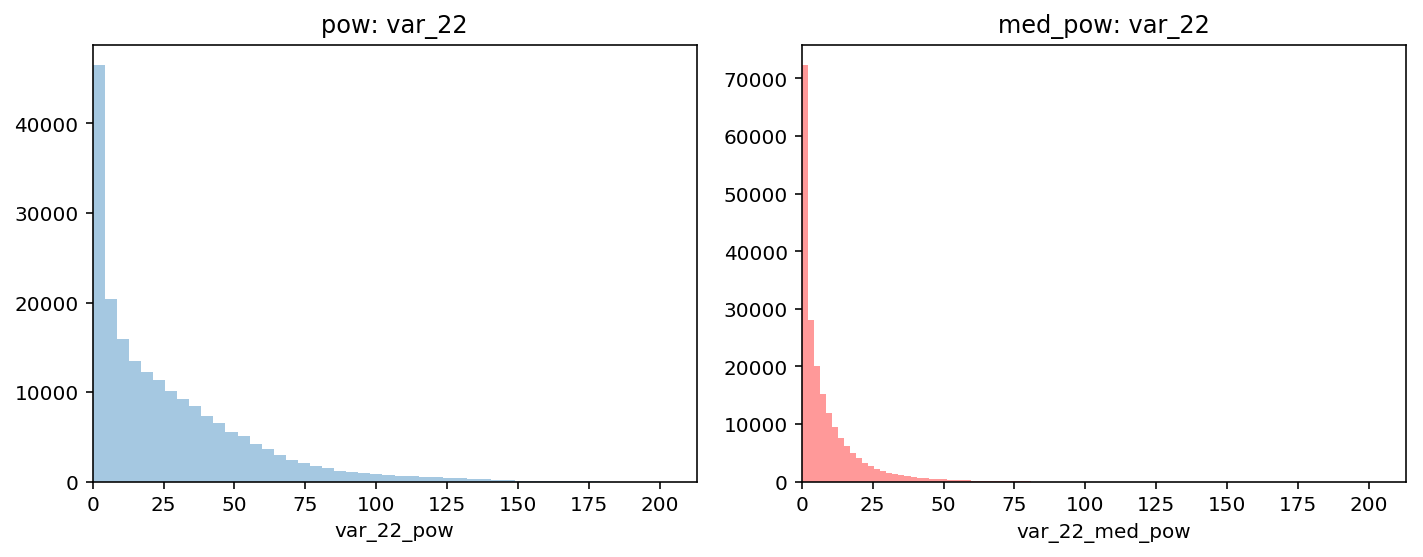

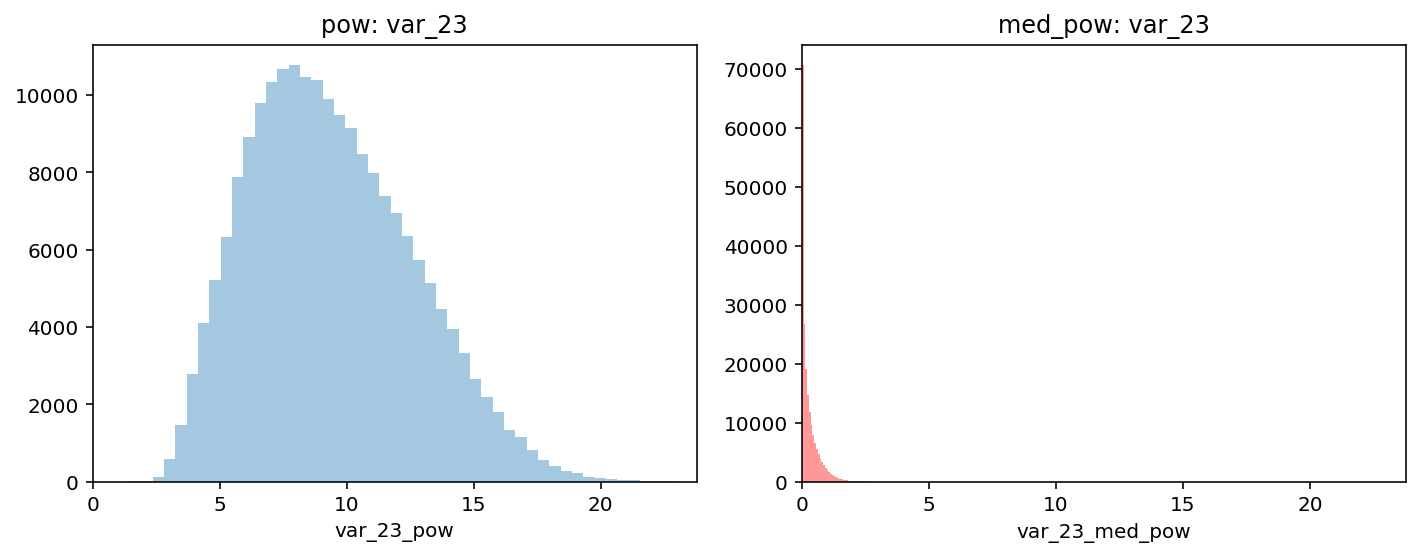

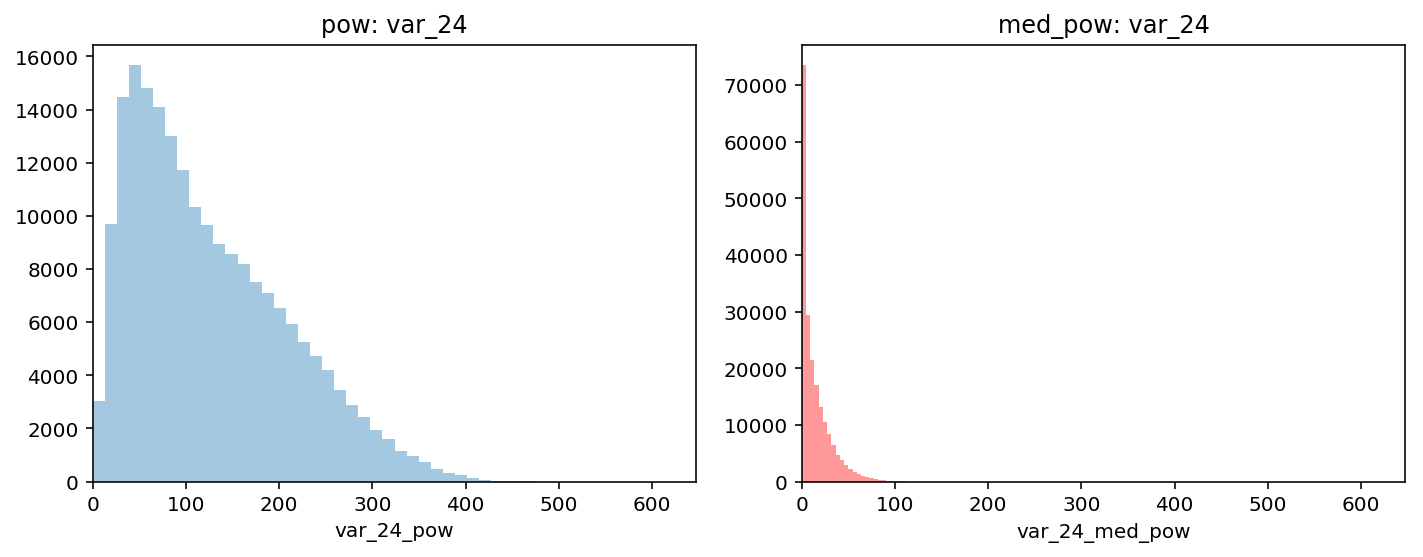

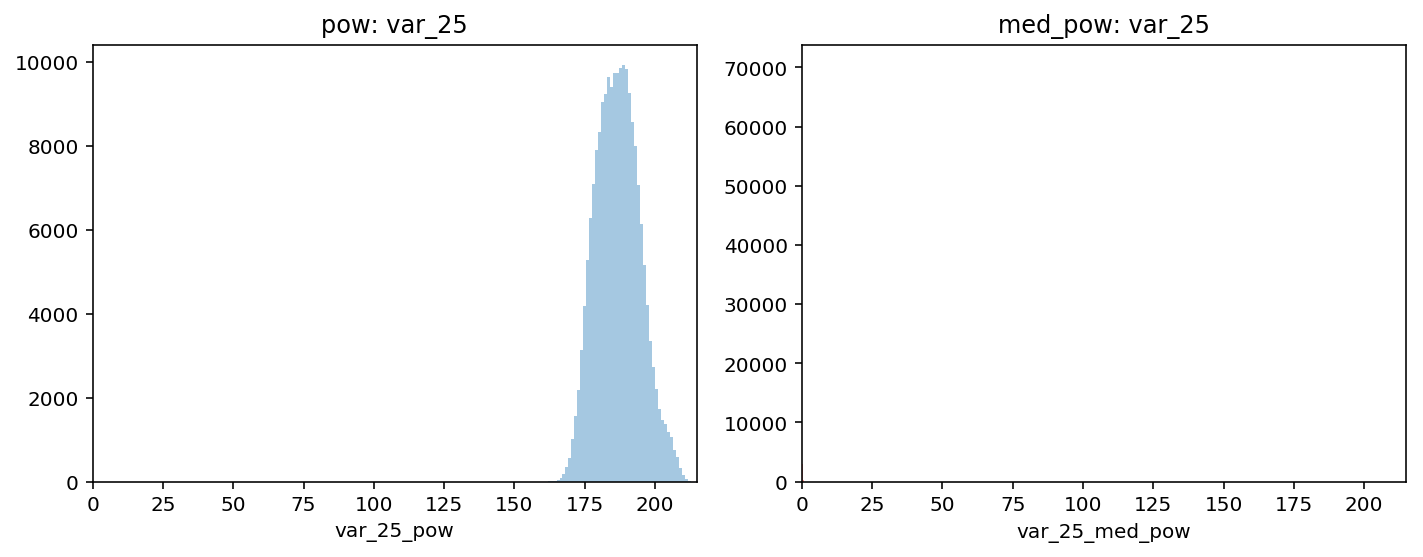

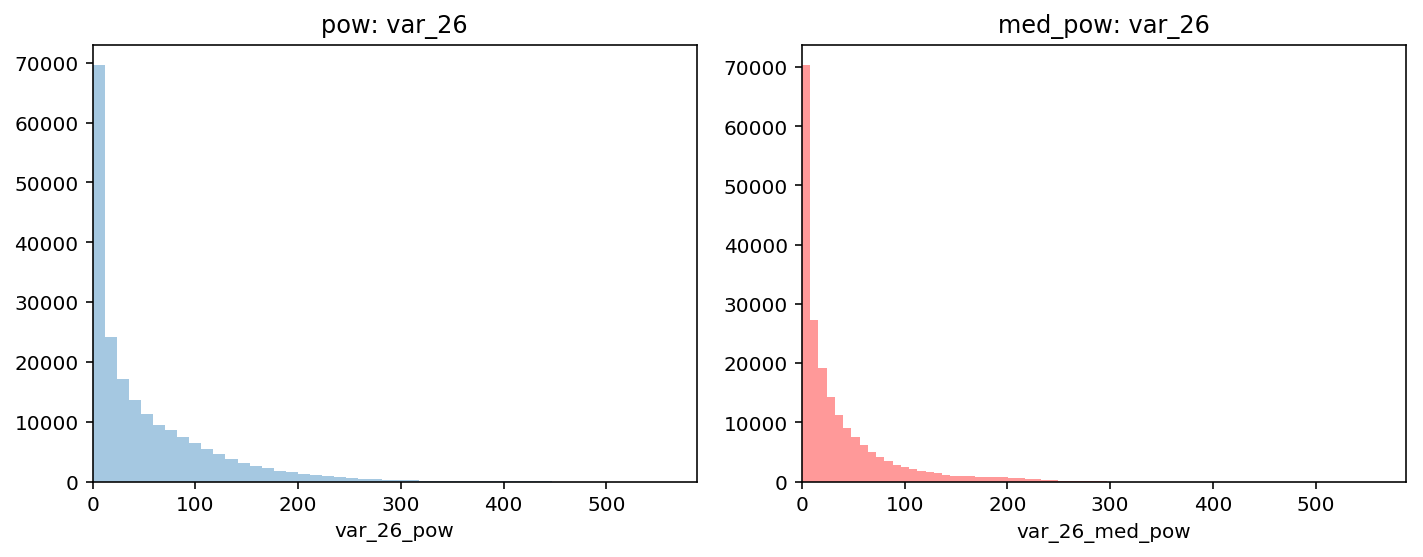

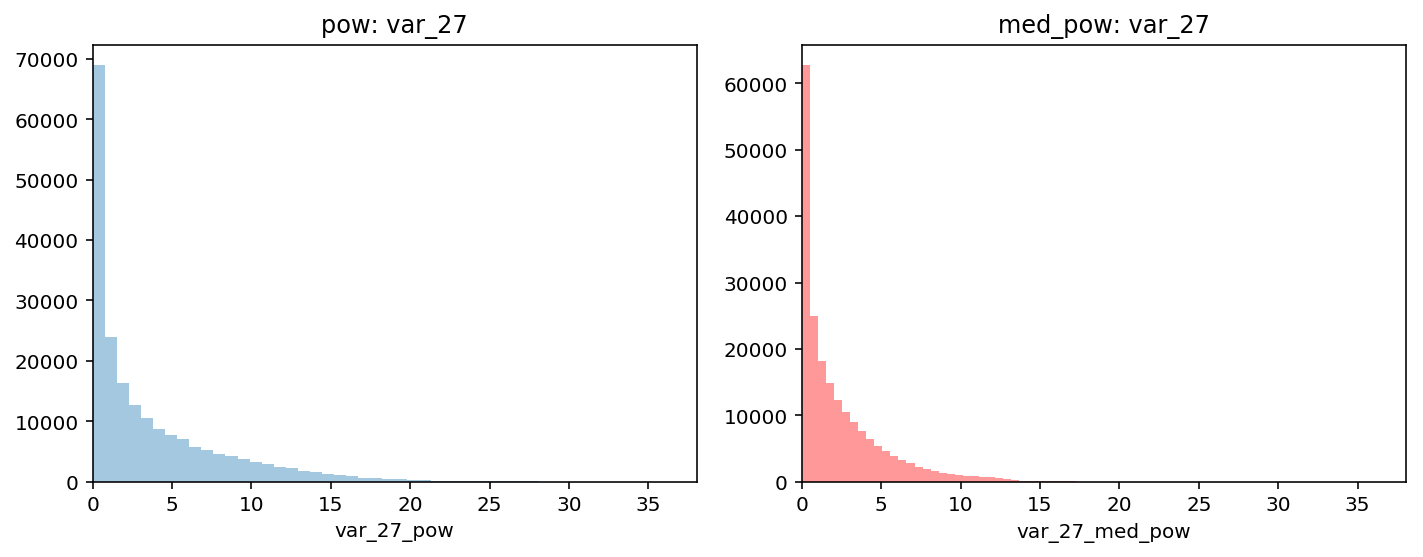

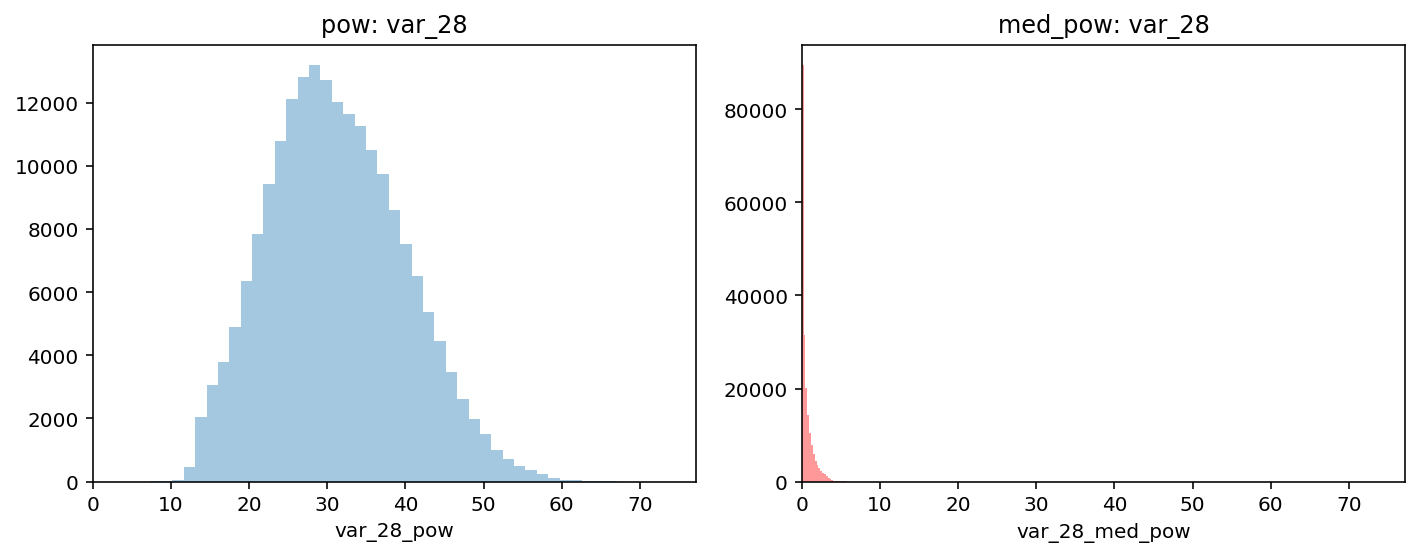

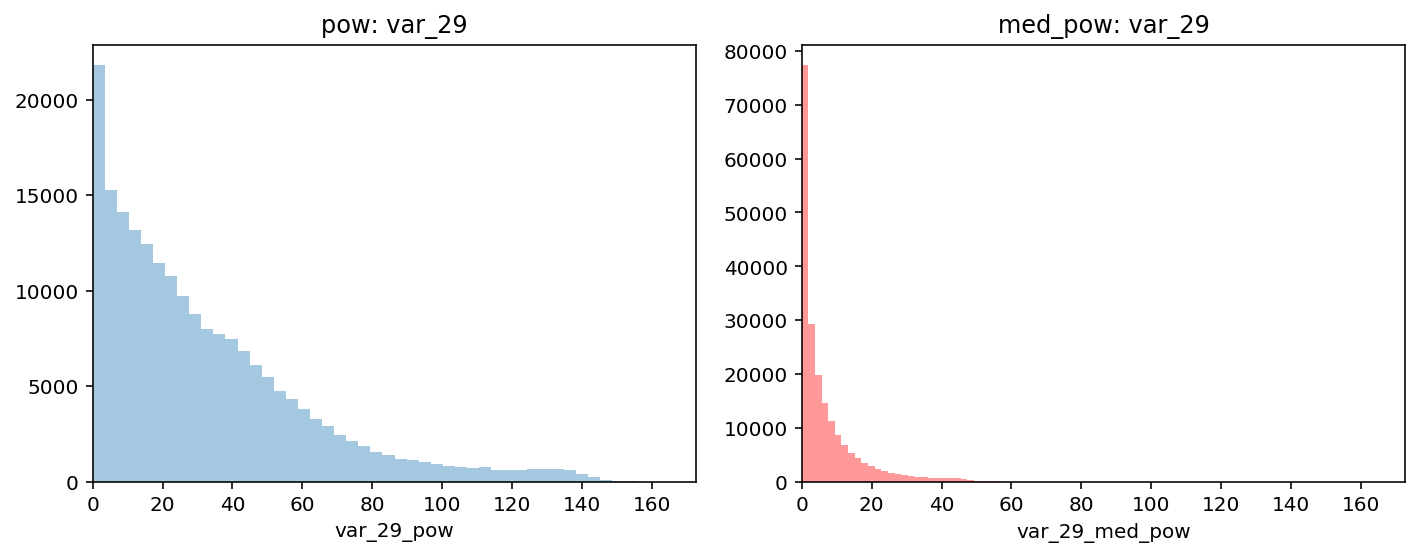

In [81]:
for col in features.columns[:30]:
    num_feature_comp_hist(features=[pow_df[col + '_pow'], med_pow_df[col + '_med_pow']], titles=[f'pow: {col}', f'med_pow: {col}'], colors=[None, 'red'])

In [89]:
temp = load_features(configs['features'], '../mnt/inputs/features/')
temp.head()

[load_features] start
now loading features ... 
loading from ../mnt/inputs/features/f001_var_141.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_135.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_122.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_129.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_148.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_160.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_154.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_116.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_173.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_18.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_186.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_167.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_25.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_192.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_31.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_199.pkl.gz

loading from ../mnt/inputs/features/f001_var_146.pkl.gz ...
loading from ../mnt/inputs/features/f002_horizontal_skew.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_11.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_47.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_92.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_183.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_86.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_177.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_67.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_41.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_170.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_29.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_132.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_120.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_127.pkl.gz ...
loading from ../mnt/inputs/features/f001_var_54.pkl.gz ...
loading from ../mnt/inputs/features/f

loading from ../mnt/inputs/features/f003_r1_var_153.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_158.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_154.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_162.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_159.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_155.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_163.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_16.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_160.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_164.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_165.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_169.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_161.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_17.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_166.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_167.pkl.g

loading from ../mnt/inputs/features/f003_r1_var_9.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_98.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_95.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_99.pkl.gz ...
loading from ../mnt/inputs/features/f003_r1_var_96.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_101.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_0.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_102.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_1.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_103.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_10.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_108.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_104.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_100.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_109.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_105.pkl.gz ...
loa

loading from ../mnt/inputs/features/f003_r2_var_29.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_32.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_37.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_33.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_38.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_34.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_39.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_42.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_35.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_43.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_4.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_44.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_40.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_49.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_45.pkl.gz ...
loading from ../mnt/inputs/features/f003_r2_var_41.pkl.gz ...
loading f

loading from ../mnt/inputs/features/f004_mode_shift_pow_var_141.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_143.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_144.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_145.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_146.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_149.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_147.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_15.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_148.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_150.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_151.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_152.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_153.pkl.gz ...
loading from ../mnt/inputs

loading from ../mnt/inputs/features/f004_mode_shift_pow_var_62.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_64.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_63.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_65.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_66.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_67.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_70.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_68.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_71.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_69.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_7.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_72.pkl.gz ...
loading from ../mnt/inputs/features/f004_mode_shift_pow_var_73.pkl.gz ...
loading from ../mnt/inputs/features/f00

ID_code  f001_var_0  f001_var_1  f001_var_10  f001_var_100  f001_var_101  \
0  train_0      8.9255     -6.7863       2.9252        9.4763       13.3102   
1  train_1     11.5006     -4.1473      -0.4032      -13.6950        8.4068   
2  train_2      8.6093     -2.7457      -0.3249       -0.3939       12.6317   
3  train_3     11.0604     -2.1518       2.3061      -19.8592       22.5316   
4  train_4      9.8369     -1.4834      -9.4458      -22.9264       12.3562   

   f001_var_102  f001_var_103  f001_var_104  f001_var_105  f001_var_106  \
0       26.5376        1.4403       14.7100        6.0454        9.5426   
1       35.4734        1.7093       15.1866        2.6227        7.3412   
2       14.8863        1.3854       15.0284        3.9995        5.3683   
3       18.6129        1.3512        9.3291        4.2835       10.3907   
4       17.3410        1.6940        7.1179        5.1934        8.8230   

   f001_var_107  f001_var_108  f001_var_109  f001_var_11  f001_var_110  \
0       17.1554       14.1104       24.3627       3.1821        2.0323   
1       32.0888       13.9550       13.0858       8.0585        6.6203   
2        8.6273       14.1963       20.3882     -11.2648        3.2304   
3        7.0874       14.3256       14.4135       2.8102        4.2827   
4       10.6617       14.0837       28.2749     -12.1419       -0.1937   

   f001_var_111  f001_var_112  f001_var_113  f001_var_114  f001_var_115  \
0        6.7602        3.9141       -0.4851        2.5240        1.5093   
1        7.1051        5.3523        8.5426        3.6159        4.1569   
2        5.7033        4.5255        2.1929        3.1290        2.9044   
3        6.9750        1.6480       11.6896        2.5762       -2.5459   
4        5.9654        1.0719        7.9923        2.9138       -3.6135   

   f001_var_116  f001_var_117  f001_var_118  f001_var_119  f001_var_12  \
0        2.5516       15.5752      -13.4221        7.2739      14.0137   
1        3.0454        7.8522      -11.5100        7.5109      14.0239   
2        1.1696       28.7632      -17.2738        2.1056      14.1929   
3        5.3446       38.1015        3.5732        5.0988      13.8463   
4        1.4684       25.6795       13.8224        4.7478      13.8481   

   f001_var_120  f001_var_121  f001_var_122  f001_var_123  f001_var_124  \
0       16.0094        9.7268        0.8897        0.7754        4.2218   
1       31.5899        9.5018        8.2736       10.1633        0.1225   
2       21.1613        8.9573        2.7768       -2.1746        3.6932   
3       30.5644       11.3025        3.9618       -8.2464        2.7038   
4       41.1037       12.7140        5.2964        9.7289        3.9370   

   f001_var_125  f001_var_126  f001_var_127  f001_var_128  f001_var_129  \
0       12.0039       13.8571       -0.7338       -1.9245       15.4462   
1       12.5942       14.5697        2.4354        0.8194       16.5346   
2       12.4653       14.1978       -2.5511       -0.9479       17.1092   
3       12.3441       12.5431       -1.3683        3.5974       13.9761   
4       12.1316       12.5815        7.0642        5.6518       10.9346   

   f001_var_13  f001_var_130  f001_var_131  f001_var_132  f001_var_133  \
0       0.5745       12.8287        0.3587        9.6508        6.5674   
1       8.4135       12.4205       -0.1780        5.7582        7.0513   
2       7.3124       11.5419        0.0975        8.8186        6.6231   
3      11.9704       14.3003        1.0486        8.9500        7.1954   
4       7.8895       11.4266        0.9442        7.7532        6.6173   

   f001_var_134  f001_var_135  f001_var_136  f001_var_137  f001_var_138  \
0        5.1726        3.1345       29.4547       31.4045        2.8279   
1        1.9568       -8.9921        9.7797       18.1577       -1.9721   
2        3.9358      -11.7218       24.5437       15.5827        3.8212   
3       -1.1984        1.9586       27.5609       24.6065       -2.8233   
4       -6.830

In [90]:
temp.head()

ID_code  f001_var_0  f001_var_1  f001_var_10  f001_var_100  f001_var_101  \
0  train_0      8.9255     -6.7863       2.9252        9.4763       13.3102   
1  train_1     11.5006     -4.1473      -0.4032      -13.6950        8.4068   
2  train_2      8.6093     -2.7457      -0.3249       -0.3939       12.6317   
3  train_3     11.0604     -2.1518       2.3061      -19.8592       22.5316   
4  train_4      9.8369     -1.4834      -9.4458      -22.9264       12.3562   

   f001_var_102  f001_var_103  f001_var_104  f001_var_105  f001_var_106  \
0       26.5376        1.4403       14.7100        6.0454        9.5426   
1       35.4734        1.7093       15.1866        2.6227        7.3412   
2       14.8863        1.3854       15.0284        3.9995        5.3683   
3       18.6129        1.3512        9.3291        4.2835       10.3907   
4       17.3410        1.6940        7.1179        5.1934        8.8230   

   f001_var_107  f001_var_108  f001_var_109  f001_var_11  f001_var_110  \
0       17.1554       14.1104       24.3627       3.1821        2.0323   
1       32.0888       13.9550       13.0858       8.0585        6.6203   
2        8.6273       14.1963       20.3882     -11.2648        3.2304   
3        7.0874       14.3256       14.4135       2.8102        4.2827   
4       10.6617       14.0837       28.2749     -12.1419       -0.1937   

   f001_var_111  f001_var_112  f001_var_113  f001_var_114  f001_var_115  \
0        6.7602        3.9141       -0.4851        2.5240        1.5093   
1        7.1051        5.3523        8.5426        3.6159        4.1569   
2        5.7033        4.5255        2.1929        3.1290        2.9044   
3        6.9750        1.6480       11.6896        2.5762       -2.5459   
4        5.9654        1.0719        7.9923        2.9138       -3.6135   

   f001_var_116  f001_var_117  f001_var_118  f001_var_119  f001_var_12  \
0        2.5516       15.5752      -13.4221        7.2739      14.0137   
1        3.0454        7.8522      -11.5100        7.5109      14.0239   
2        1.1696       28.7632      -17.2738        2.1056      14.1929   
3        5.3446       38.1015        3.5732        5.0988      13.8463   
4        1.4684       25.6795       13.8224        4.7478      13.8481   

   f001_var_120  f001_var_121  f001_var_122  f001_var_123  f001_var_124  \
0       16.0094        9.7268        0.8897        0.7754        4.2218   
1       31.5899        9.5018        8.2736       10.1633        0.1225   
2       21.1613        8.9573        2.7768       -2.1746        3.6932   
3       30.5644       11.3025        3.9618       -8.2464        2.7038   
4       41.1037       12.7140        5.2964        9.7289        3.9370   

   f001_var_125  f001_var_126  f001_var_127  f001_var_128  f001_var_129  \
0       12.0039       13.8571       -0.7338       -1.9245       15.4462   
1       12.5942       14.5697        2.4354        0.8194       16.5346   
2       12.4653       14.1978       -2.5511       -0.9479       17.1092   
3       12.3441       12.5431       -1.3683        3.5974       13.9761   
4       12.1316       12.5815        7.0642        5.6518       10.9346   

   f001_var_13  f001_var_130  f001_var_131  f001_var_132  f001_var_133  \
0       0.5745       12.8287        0.3587        9.6508        6.5674   
1       8.4135       12.4205       -0.1780        5.7582        7.0513   
2       7.3124       11.5419        0.0975        8.8186        6.6231   
3      11.9704       14.3003        1.0486        8.9500        7.1954   
4       7.8895       11.4266        0.9442        7.7532        6.6173   

   f001_var_134  f001_var_135  f001_var_136  f001_var_137  f001_var_138  \
0        5.1726        3.1345       29.4547       31.4045        2.8279   
1        1.9568       -8.9921        9.7797       18.1577       -1.9721   
2        3.9358      -11.7218       24.5437       15.5827        3.8212   
3       -1.1984        1.9586       27.5609       24.6065       -2.8233   
4       -6.830